# Acceptance & Chargeback EDA

Exploratory analysis of Globepay transaction data to identify patterns in acceptance rates, decline reasons, and chargeback behavior across countries and currencies.

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

# File paths - using relative paths for better portability
accept_path = "input_data/acceptance_report.csv"
chargeback_path = "input_data/chargeback_report.csv"

# Verify files exist before loading
import os
print(f"Current working directory: {os.getcwd()}")
print(f"Acceptance file exists: {os.path.exists(accept_path)}")
print(f"Chargeback file exists: {os.path.exists(chargeback_path)}")

# Load the datasets
accept_df = pd.read_csv(accept_path, sep=';')
chargeback_df = pd.read_csv(chargeback_path)

# Convert date_time to datetime
accept_df['date_time'] = pd.to_datetime(accept_df['date_time'])

print("Acceptance data preview:")
display(accept_df.head())
print(f"\nAcceptance data shape: {accept_df.shape}")

print("\nChargeback data preview:")
display(chargeback_df.head())
print(f"Chargeback data shape: {chargeback_df.shape}")

Current working directory: /Users/odyssey/Downloads/deel
Acceptance file exists: True
Chargeback file exists: True
Acceptance data preview:


,external_ref,status,source,ref,date_time,state,cvv_provided,amount,country,currency,rates
0,nCyEIIGaP5QQ2Wqb-_Rt8,True,GLOBALPAY,evt_1ESgcCOV7fY1ChY1MkZizZt,2019-01-01 00:00:00+00:00,DECLINED,False,1020.46,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
1,ptNiI9B7NNpK7VsMZx6zZ,True,GLOBALPAY,evt_1EBMGCEjEtianKMJaZXOx1y,2019-01-01 04:48:00+00:00,ACCEPTED,False,1582.57,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
2,1GS5BDKBnauCt-3nHPs6x,True,GLOBALPAY,evt_1EOALu0AZqEhZBn9ub_nbcE,2019-01-01 09:36:00+00:00,DECLINED,False,1653.07,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
3,Y_oecYz8GjBDaxmMqkkLQ,True,GLOBALPAY,evt_1ESHsWyaSPqE1mrmJ2B6rvs,2019-01-01 14:24:00+00:00,ACCEPTED,False,2228.17,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
4,LlEs1TnKVa2xX6PH9Zsz0,True,GLOBALPAY,evt_1EjzPk13qLzmvDR_4hXuMMw,2019-01-01 19:12:00+00:00,ACCEPTED,False,2589.92,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."



Acceptance data shape: (5430, 11)

Chargeback data preview:


,external_ref,status,source,chargeback
0,_-UTDS0dMlagMWEtQKMy-,True,GLOBALPAY,False
1,_0fqf75KiPa0iiviKCSsU,True,GLOBALPAY,False
2,_0H9Ecd_RctsLetId-p14,True,GLOBALPAY,False
3,_0wBrMzAzIhO3fQRWUcBH,True,GLOBALPAY,False
4,_25jZuGDrmwUEdAwKp1xV,True,GLOBALPAY,False


Chargeback data shape: (5430, 4)


Acceptance dataset shape: (5430, 11)


,external_ref,status,source,ref,date_time,state,cvv_provided,amount,country,currency,rates
count,5430,5430,5430,5430,5430,5430,5430,5430.000000,5430,5430,5430
unique,5430,1,1,5430,NaN,2,2,NaN,6,5,1086
top,nCyEIIGaP5QQ2Wqb-_Rt8,True,GLOBALPAY,evt_1ESgcCOV7fY1ChY1MkZizZt,NaN,ACCEPTED,False,NaN,US,USD,"{""CAD"":1.415,""EUR"":0.926,""MXN"":25.103,""USD"":1,..."
freq,1,5430,5430,1,NaN,3759,5390,NaN,905,1810,5
mean,NaN,NaN,NaN,NaN,2019-04-01 09:36:00+00:00,NaN,NaN,86938.605757,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2019-01-01 00:00:00+00:00,NaN,NaN,-23.780000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2019-02-15 04:48:00+00:00,NaN,NaN,42481.355000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2019-04-01 09:36:00+00:00,NaN,NaN,85488.025000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2019-05-16 14:24:00+00:00,NaN,NaN,128548.397500,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,2019-06-30 19:12:00+00:00,NaN,NaN,180371.520000,NaN,NaN,NaN


Chargeback dataset shape: (5430, 4)


,external_ref,status,source,chargeback
count,5430,5430,5430,5430
unique,5430,1,1,2
top,_-UTDS0dMlagMWEtQKMy-,True,GLOBALPAY,False
freq,1,5430,5430,5207


Transaction state counts:


state
ACCEPTED    3759
DECLINED    1671
Name: count, dtype: int64

/var/folders/dv/r84qbv2j0110w8bj8j4pb9240000gn/T/ipykernel_95516/2560203057.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette=['#4CAF50', '#F44336'])


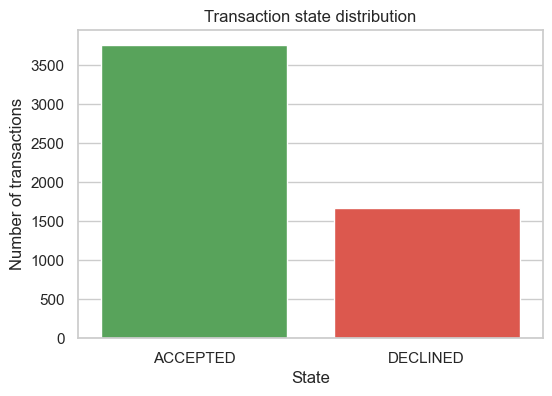

In [3]:
print('Acceptance dataset shape:', accept_df.shape)
display(accept_df.describe(include='all'))

print('Chargeback dataset shape:', chargeback_df.shape)
display(chargeback_df.describe(include='all'))

state_counts = accept_df['state'].value_counts()
print('Transaction state counts:')
display(state_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=state_counts.index, y=state_counts.values, palette=['#4CAF50', '#F44336'])
plt.title('Transaction state distribution')
plt.xlabel('State')
plt.ylabel('Number of transactions')
plt.show()

Missing USD conversions: 0



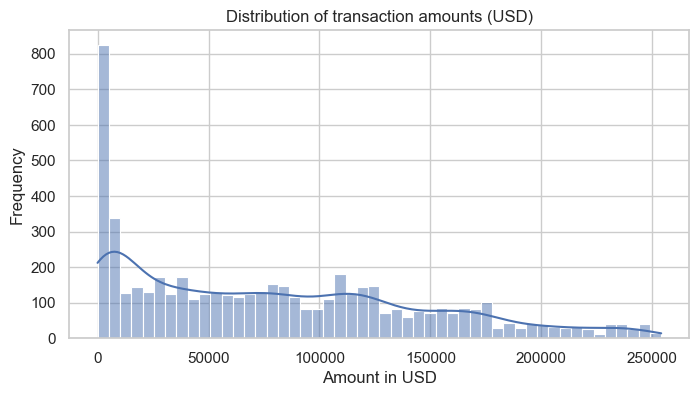

In [4]:
def convert_to_usd(row):
    try:
        rates = json.loads(row['rates'])
        rate = rates.get(row['currency'])
        return row['amount'] / rate if rate else np.nan
    except Exception:
        return np.nan

accept_df['amount_usd'] = accept_df.apply(convert_to_usd, axis=1)

missing_usd = accept_df['amount_usd'].isna().sum()
print(f"Missing USD conversions: {missing_usd}")

plt.figure(figsize=(8,4))
sns.histplot(accept_df['amount_usd'].dropna(), bins=50, kde=True)
plt.title('Distribution of transaction amounts (USD)')
plt.xlabel('Amount in USD')
plt.ylabel('Frequency')
plt.show()

/var/folders/dv/r84qbv2j0110w8bj8j4pb9240000gn/T/ipykernel_95516/4171462856.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  accept_df['day'] = accept_df['date_time'].dt.to_period('D').apply(lambda r: r.start_time)
/var/folders/dv/r84qbv2j0110w8bj8j4pb9240000gn/T/ipykernel_95516/4171462856.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  accept_df['week'] = accept_df['date_time'].dt.to_period('W').apply(lambda r: r.start_time)
/var/folders/dv/r84qbv2j0110w8bj8j4pb9240000gn/T/ipykernel_95516/4171462856.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  accept_df['month'] = accept_df['date_time'].dt.to_period('M').apply(lambda r: r.start_time)


Data aggregation completed:
Daily periods: 181
Weekly periods: 26
Monthly periods: 6


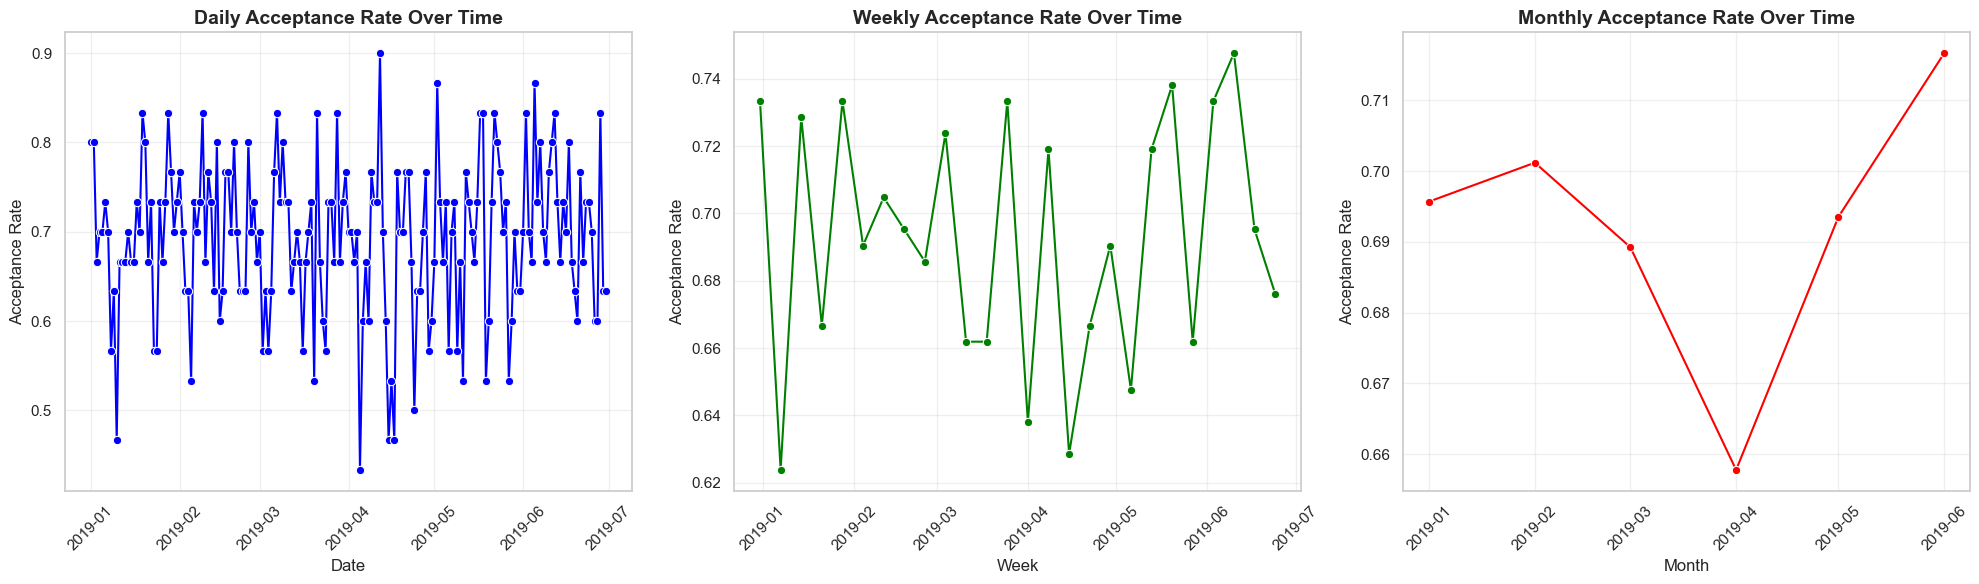


Daily Acceptance Rate:
Mean: 0.6923
Min: 0.4333
Max: 0.9000
Std: 0.0867

Weekly Acceptance Rate:
Mean: 0.6925
Min: 0.6238
Max: 0.7476
Std: 0.0368

Monthly Acceptance Rate:
Mean: 0.6924
Min: 0.6578
Max: 0.7167
Std: 0.0194


In [5]:
accept_df['day'] = accept_df['date_time'].dt.to_period('D').apply(lambda r: r.start_time)
daily_counts = accept_df.groupby(['day', 'state']).size().unstack(fill_value=0)
daily_counts['accept_rate'] = daily_counts.get('ACCEPTED', 0) / (daily_counts.sum(axis=1))

accept_df['week'] = accept_df['date_time'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_counts = accept_df.groupby(['week', 'state']).size().unstack(fill_value=0)
weekly_counts['accept_rate'] = weekly_counts.get('ACCEPTED', 0) / (weekly_counts.sum(axis=1))

accept_df['month'] = accept_df['date_time'].dt.to_period('M').apply(lambda r: r.start_time)
monthly_counts = accept_df.groupby(['month', 'state']).size().unstack(fill_value=0)
monthly_counts['accept_rate'] = monthly_counts.get('ACCEPTED', 0) / (monthly_counts.sum(axis=1))

print("Data aggregation completed:")
print(f"Daily periods: {len(daily_counts)}")
print(f"Weekly periods: {len(weekly_counts)}")
print(f"Monthly periods: {len(monthly_counts)}")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

sns.lineplot(data=daily_counts, x=daily_counts.index, y='accept_rate', marker='o', ax=ax1, color='blue')
ax1.set_title('Daily Acceptance Rate Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Acceptance Rate', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

sns.lineplot(data=weekly_counts, x=weekly_counts.index, y='accept_rate', marker='o', ax=ax2, color='green')
ax2.set_title('Weekly Acceptance Rate Over Time', fontsize=14, fontweight='bold')
ax2.set_xlabel('Week', fontsize=12)
ax2.set_ylabel('Acceptance Rate', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

sns.lineplot(data=monthly_counts, x=monthly_counts.index, y='accept_rate', marker='o', ax=ax3, color='red')
ax3.set_title('Monthly Acceptance Rate Over Time', fontsize=14, fontweight='bold')
ax3.set_xlabel('Month', fontsize=12)
ax3.set_ylabel('Acceptance Rate', fontsize=12)
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nDaily Acceptance Rate:")
print(f"Mean: {daily_counts['accept_rate'].mean():.4f}")
print(f"Min: {daily_counts['accept_rate'].min():.4f}")
print(f"Max: {daily_counts['accept_rate'].max():.4f}")
print(f"Std: {daily_counts['accept_rate'].std():.4f}")

print("\nWeekly Acceptance Rate:")
print(f"Mean: {weekly_counts['accept_rate'].mean():.4f}")
print(f"Min: {weekly_counts['accept_rate'].min():.4f}")
print(f"Max: {weekly_counts['accept_rate'].max():.4f}")
print(f"Std: {weekly_counts['accept_rate'].std():.4f}")

print("\nMonthly Acceptance Rate:")
print(f"Mean: {monthly_counts['accept_rate'].mean():.4f}")
print(f"Min: {monthly_counts['accept_rate'].min():.4f}")
print(f"Max: {monthly_counts['accept_rate'].max():.4f}")
print(f"Std: {monthly_counts['accept_rate'].std():.4f}")

Countries where declined transaction amount exceeded $25M:
country
FR    $33.74M
UK    $27.49M
AE    $26.34M
US    $25.13M


/var/folders/dv/r84qbv2j0110w8bj8j4pb9240000gn/T/ipykernel_95516/2963201708.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top10_declined.index, y=top10_declined.values, palette="Reds_r")


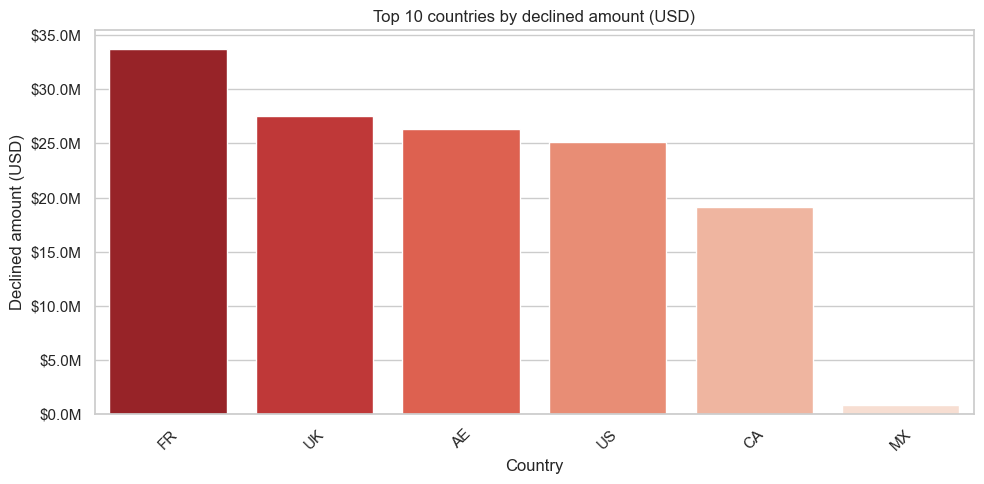

In [6]:
# Filter declined transactions and compute total USD amount by country
declined = accept_df[accept_df['state'] == 'DECLINED']
declined_by_country = declined.groupby('country')['amount_usd'].sum().sort_values(ascending=False)
high_decline = declined_by_country[declined_by_country > 25e6]
print("Countries where declined transaction amount exceeded $25M:")

# Format the high decline countries for better display
if len(high_decline) > 0:
    high_decline_formatted = high_decline.copy()
    high_decline_formatted = high_decline_formatted.apply(lambda x: f"${x/1e6:.2f}M")
    print(high_decline_formatted.to_string())
else:
    print("No countries with declined amounts exceeding $25M")

# Plot top 10 declined countries
plt.figure(figsize=(10,5))
top10_declined = declined_by_country.head(10)
ax = sns.barplot(x=top10_declined.index, y=top10_declined.values, palette="Reds_r")
plt.title('Top 10 countries by declined amount (USD)')
plt.xlabel('Country')
plt.ylabel('Declined amount (USD)')

# Format Y-axis to show currency in millions
def currency_millions(x, pos):
    return f'${x/1e6:.1f}M'

from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(currency_millions))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
merged = accept_df.merge(chargeback_df[['external_ref', 'chargeback']], on='external_ref', how='left', indicator=True)
missing_cb = merged[merged['_merge'] == 'left_only']
print(f'Number of acceptance transactions missing chargeback information: {missing_cb.shape[0]}')
print('')
print('Sample of missing chargeback transactions:')
display(missing_cb.head())

Number of acceptance transactions missing chargeback information: 0

Sample of missing chargeback transactions:


,external_ref,status,source,ref,date_time,state,cvv_provided,amount,country,currency,rates,amount_usd,day,week,month,chargeback,_merge


# Data Quality Investigation

Quality analysis of completeness, consistency, and integrity across datasets.

Acceptance dataset structure:
Shape: (5430, 15)
Data types distribution:
object                 7
datetime64[ns]         3
bool                   2
float64                2
datetime64[ns, UTC]    1
Name: count, dtype: int64

Memory usage: 3.21 MB

Chargeback dataset structure:
Shape: (5430, 4)
Data types distribution:
object    2
bool      2
Name: count, dtype: int64
Memory usage: 0.67 MB

Unique values analysis:
Acceptance dataset categorical columns: ['external_ref', 'source', 'ref', 'state', 'country', 'currency', 'rates']


/var/folders/dv/r84qbv2j0110w8bj8j4pb9240000gn/T/ipykernel_95516/3808233238.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(accept_df.dtypes))
/var/folders/dv/r84qbv2j0110w8bj8j4pb9240000gn/T/ipykernel_95516/3808233238.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(chargeback_df.dtypes))


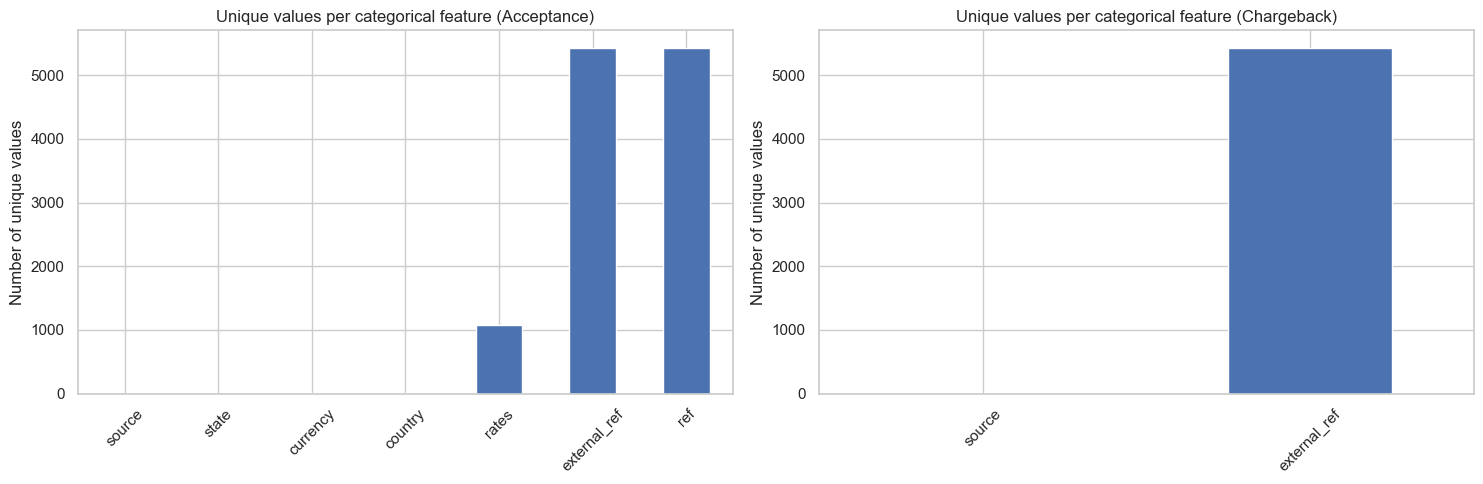

In [8]:
print("Acceptance dataset structure:")
print(f"Shape: {accept_df.shape}")
print(f"Data types distribution:")
print(pd.value_counts(accept_df.dtypes))
print(f"\nMemory usage: {accept_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nChargeback dataset structure:")
print(f"Shape: {chargeback_df.shape}")
print(f"Data types distribution:")
print(pd.value_counts(chargeback_df.dtypes))
print(f"Memory usage: {chargeback_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nUnique values analysis:")
categorical_cols_accept = accept_df.select_dtypes(include=['object']).columns
print(f"Acceptance dataset categorical columns: {list(categorical_cols_accept)}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

unique_vals_accept = accept_df.select_dtypes(include=['object']).nunique().sort_values()
if len(unique_vals_accept) > 0:
    unique_vals_accept.plot.bar(ax=axes[0], title="Unique values per categorical feature (Acceptance)")
    axes[0].set_ylabel("Number of unique values")
    axes[0].tick_params(axis='x', rotation=45)

# Unique values in chargeback dataset
unique_vals_cb = chargeback_df.select_dtypes(include=['object']).nunique().sort_values()
if len(unique_vals_cb) > 0:
    unique_vals_cb.plot.bar(ax=axes[1], title="Unique values per categorical feature (Chargeback)")
    axes[1].set_ylabel("Number of unique values")
    axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

=== MISSING VALUES ANALYSIS ===
Acceptance Dataset Missing Values:
Series([], dtype: int64)

Total missing values: 0
Percentage of complete rows: 100.00%


/Users/odyssey/Downloads/deel/venv/lib/python3.12/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
/var/folders/dv/r84qbv2j0110w8bj8j4pb9240000gn/T/ipykernel_95516/3306895296.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_country = accept_df.groupby('country').apply(lambda x: x.isnull().sum().sum())


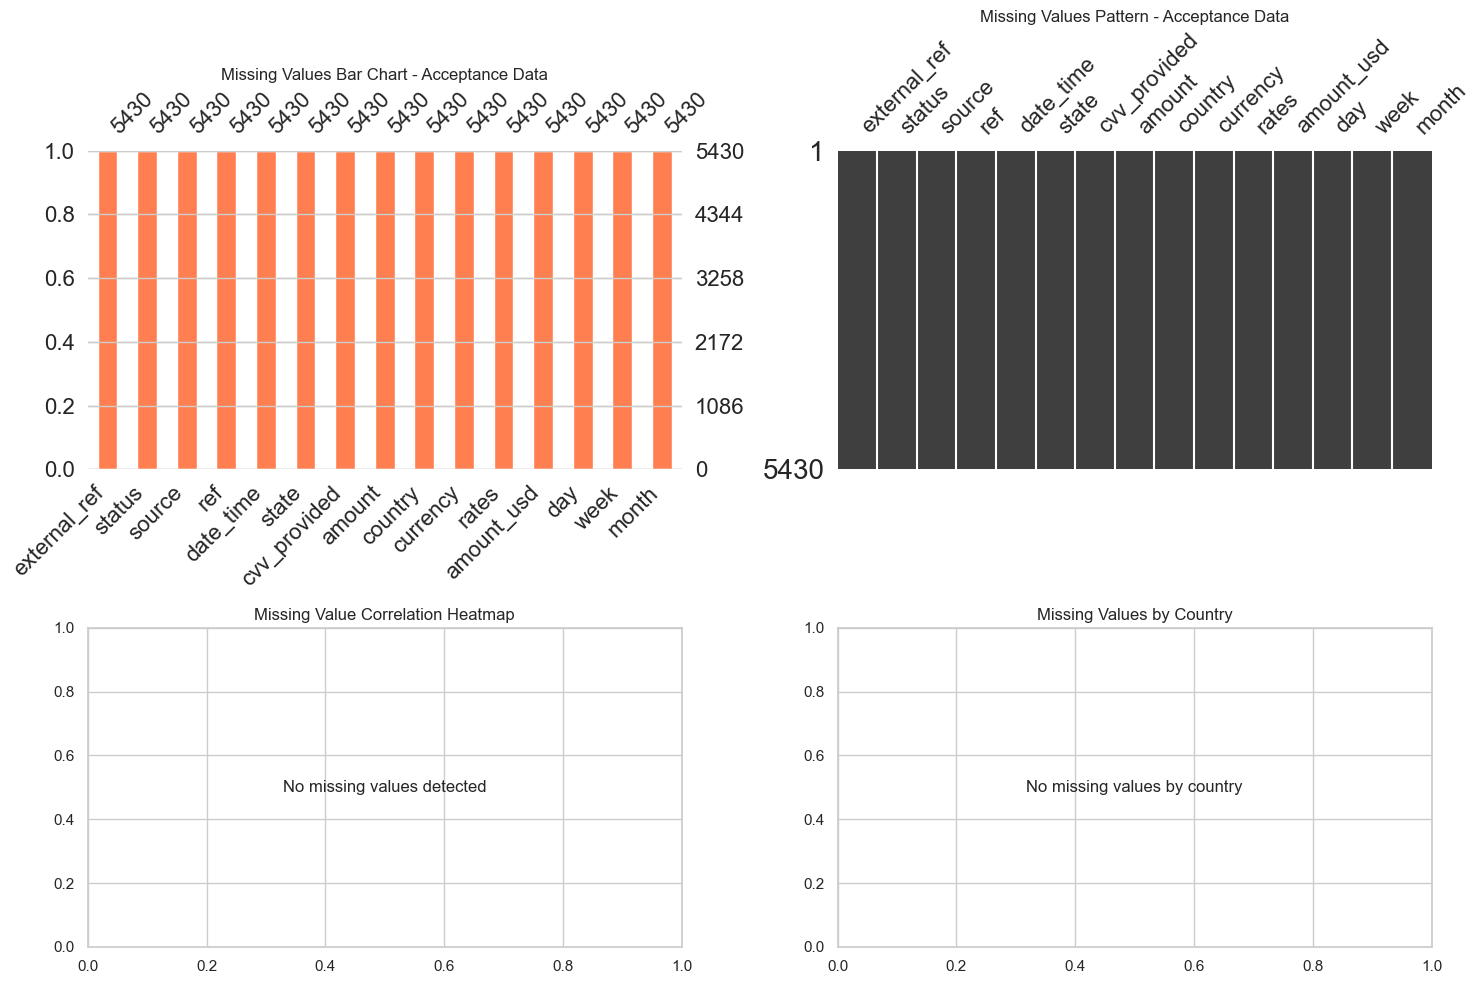

In [9]:
# Missing Value Analysis
import missingno as msno

print("=== MISSING VALUES ANALYSIS ===")
print("Acceptance Dataset Missing Values:")
missing_accept = accept_df.isnull().sum()
print(missing_accept[missing_accept > 0])

print(f"\nTotal missing values: {accept_df.isnull().sum().sum()}")
print(f"Percentage of complete rows: {(1 - accept_df.isnull().any(axis=1).mean()) * 100:.2f}%")


fig, axes = plt.subplots(2, 2, figsize=(15, 10))


msno.bar(accept_df, ax=axes[0,0], color='coral')
axes[0,0].set_title('Missing Values Bar Chart - Acceptance Data')

# Matrix visualization of missing values
msno.matrix(accept_df, ax=axes[0,1])
axes[0,1].set_title('Missing Values Pattern - Acceptance Data')

# Heatmap showing missing value correlations
if accept_df.isnull().sum().sum() > 0:
    missing_corr = accept_df.isnull().corr()
    sns.heatmap(missing_corr, annot=True, cmap='RdYlBu', ax=axes[1,0])
    axes[1,0].set_title('Missing Value Correlation Heatmap')
else:
    axes[1,0].text(0.5, 0.5, 'No missing values detected', ha='center', va='center')
    axes[1,0].set_title('Missing Value Correlation Heatmap')

# Missing values by country (if any)
if 'country' in accept_df.columns:
    missing_by_country = accept_df.groupby('country').apply(lambda x: x.isnull().sum().sum())
    if missing_by_country.sum() > 0:
        missing_by_country[missing_by_country > 0].plot.bar(ax=axes[1,1])
        axes[1,1].set_title('Missing Values by Country')
        axes[1,1].tick_params(axis='x', rotation=45)
    else:
        axes[1,1].text(0.5, 0.5, 'No missing values by country', ha='center', va='center')
        axes[1,1].set_title('Missing Values by Country')

plt.tight_layout()
plt.show()

In [10]:
# Data Quality and Consistency
print("=== DUPLICATE ANALYSIS ===")

# Check for exact duplicates
exact_duplicates_accept = accept_df.duplicated().sum()
print(f"Exact duplicates in acceptance data: {exact_duplicates_accept}")

# Check for duplicates excluding external_ref (business logic duplicates)
if 'external_ref' in accept_df.columns:
    business_duplicates = accept_df.drop(['external_ref'], axis=1).duplicated().sum()
    print(f"Business logic duplicates (excluding external_ref): {business_duplicates}")
    
    # Check for multiple states for same external_ref
    ref_state_counts = accept_df.groupby('external_ref')['state'].nunique()
    multi_state_refs = ref_state_counts[ref_state_counts > 1]
    print(f"External refs with multiple states: {len(multi_state_refs)}")
    if len(multi_state_refs) > 0:
        print("Sample external refs with multiple states:")
        print(multi_state_refs.head())


print("\n=== DATA CONSISTENCY CHECKS ===")


if 'amount' in accept_df.columns:
    negative_amounts = (accept_df['amount'] < 0).sum()
    print(f"Transactions with negative amounts: {negative_amounts}")


if 'date_time' in accept_df.columns:
    current_time = pd.Timestamp.now(tz=accept_df['date_time'].dt.tz)
    future_dates = (accept_df['date_time'] > current_time).sum()
    print(f"Transactions with future dates: {future_dates}")


if 'amount' in accept_df.columns:
    zero_amounts = (accept_df['amount'] == 0).sum()
    print(f"Transactions with zero amounts: {zero_amounts}")


if 'currency' in accept_df.columns:
    print(f"\nCurrency distribution:")
    currency_dist = accept_df['currency'].value_counts()
    print(currency_dist.head(10))
    

    unusual_currencies = accept_df[accept_df['currency'].str.len() != 3]['currency'].value_counts()
    if len(unusual_currencies) > 0:
        print(f"\nUnusual currency codes: {len(unusual_currencies)}")
        print(unusual_currencies.head())

=== DUPLICATE ANALYSIS ===
Exact duplicates in acceptance data: 0
Business logic duplicates (excluding external_ref): 0
External refs with multiple states: 0

=== DATA CONSISTENCY CHECKS ===
Transactions with negative amounts: 1
Transactions with future dates: 0
Transactions with zero amounts: 0

Currency distribution:
currency
USD    1810
MXN     905
GBP     905
EUR     905
CAD     905
Name: count, dtype: int64


# Statistical Analysis

In this section, we'll perform statistical analysis including distribution analysis, outlier detection, correlation analysis, and visualizations to understand patterns in the payment data.

NUMERICAL VARIABLE DISTRIBUTIONS


/Users/odyssey/Downloads/deel/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/dv/r84qbv2j0110w8bj8j4pb9240000gn/T/ipykernel_95516/191857301.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[1,2].boxplot(box_data, labels=['ACCEPTED', 'DECLINED'], patch_artist=True)


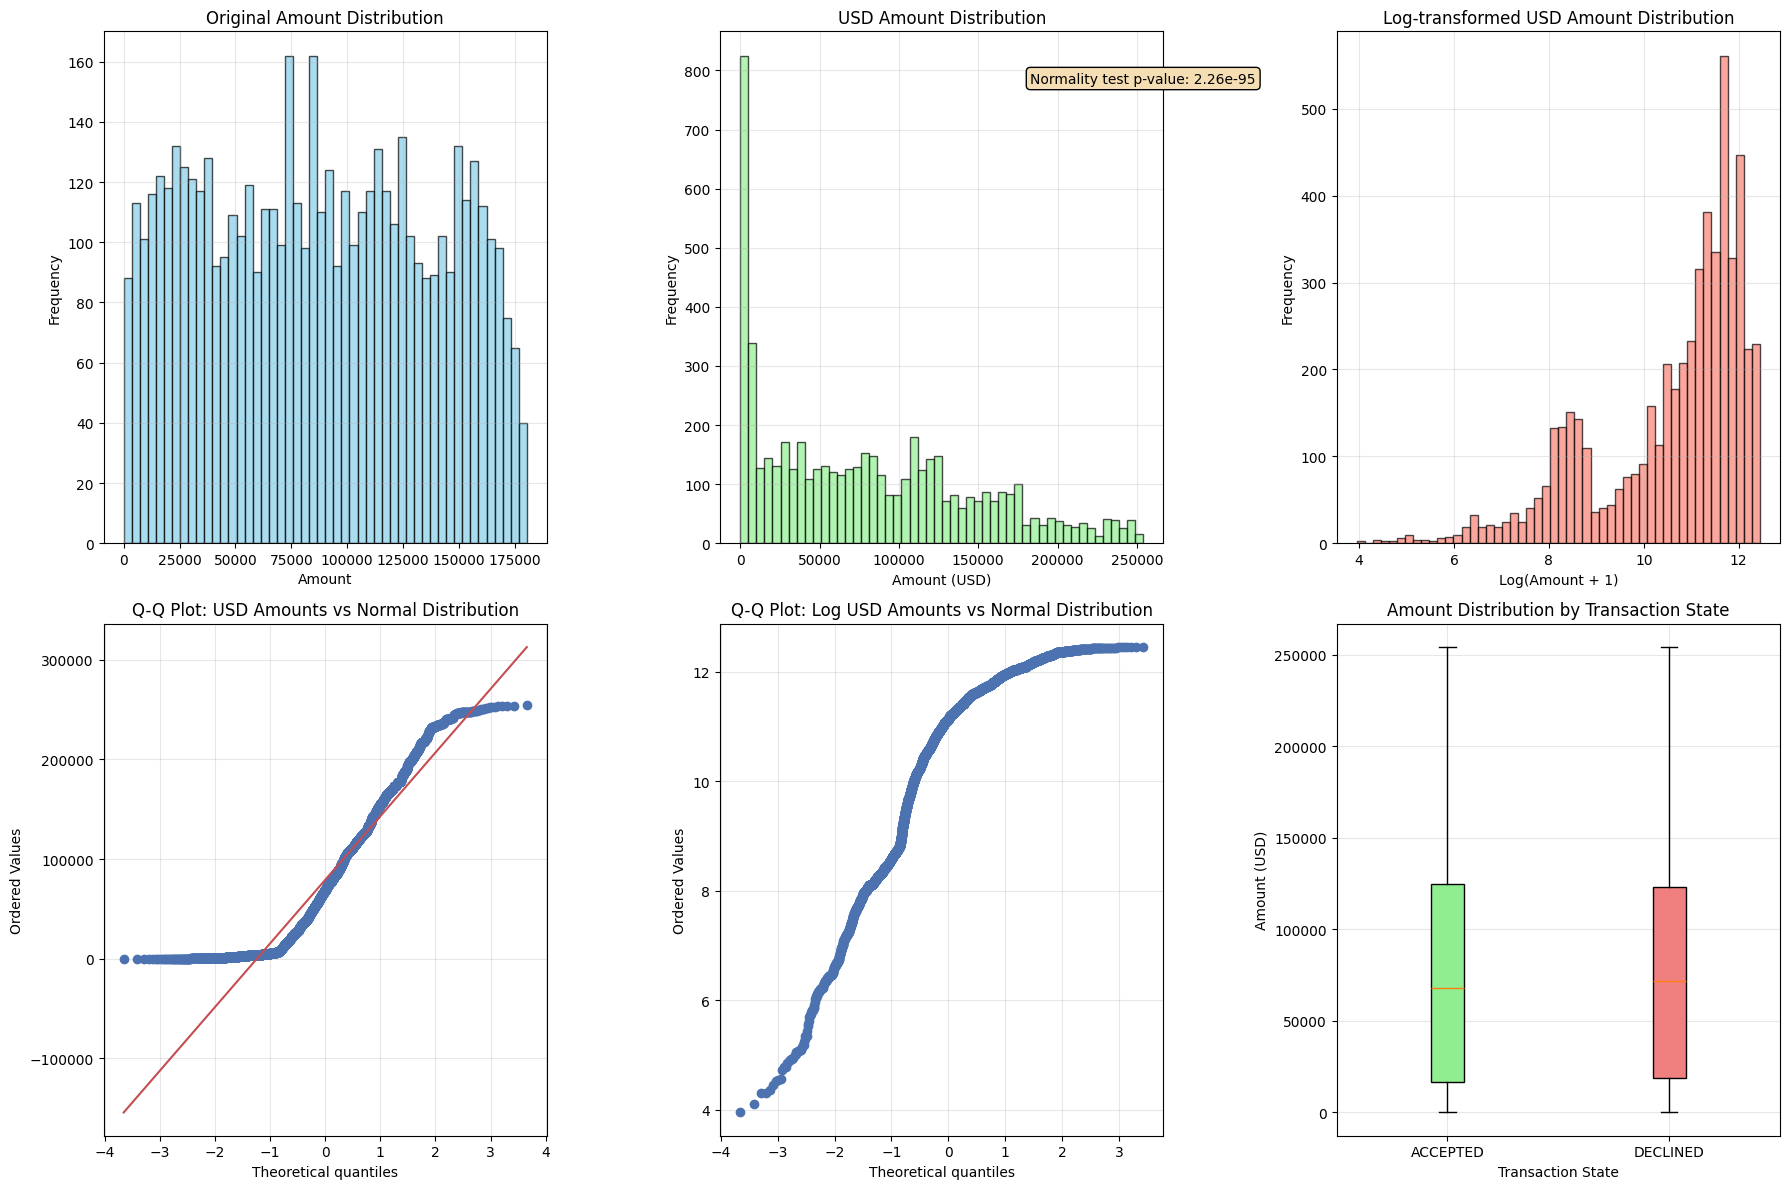

STATISTICAL SUMMARY FOR USD AMOUNTS
Number of transactions: 5,430
Skewness: 0.624
Kurtosis: -0.551
Mean: $79239.69
Median: $68694.32
Standard Deviation: $66414.43
Coefficient of Variation: 0.838

Percentile Analysis:
1th percentile: $417.76
5th percentile: $2018.38
10th percentile: $3613.22
25th percentile: $17267.40
50th percentile: $68694.32
75th percentile: $123976.69
90th percentile: $173950.83
95th percentile: $206686.11
99th percentile: $243039.40


In [11]:
from scipy import stats
from scipy.stats import normaltest, skew, kurtosis
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('default')

print("NUMERICAL VARIABLE DISTRIBUTIONS")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

if 'amount' in accept_df.columns:
    amount_data = accept_df['amount'].dropna()
    axes[0,0].hist(amount_data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Original Amount Distribution')
    axes[0,0].set_xlabel('Amount')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].grid(True, alpha=0.3)


if 'amount_usd' in accept_df.columns:
    usd_amounts = accept_df['amount_usd'].dropna()
    axes[0,1].hist(usd_amounts, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0,1].set_title('USD Amount Distribution')
    axes[0,1].set_xlabel('Amount (USD)')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].grid(True, alpha=0.3)
    

    if len(usd_amounts) > 0:
        stat, p_value = normaltest(usd_amounts)
        axes[0,1].text(0.7, 0.9, f'Normality test p-value: {p_value:.2e}', 
                       transform=axes[0,1].transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

if 'amount_usd' in accept_df.columns and len(usd_amounts) > 0:
    log_amounts = np.log1p(usd_amounts)
    axes[0,2].hist(log_amounts, bins=50, alpha=0.7, color='salmon', edgecolor='black')
    axes[0,2].set_title('Log-transformed USD Amount Distribution')
    axes[0,2].set_xlabel('Log(Amount + 1)')
    axes[0,2].set_ylabel('Frequency')
    axes[0,2].grid(True, alpha=0.3)


if 'amount_usd' in accept_df.columns and len(usd_amounts) > 0:
    stats.probplot(usd_amounts, dist="norm", plot=axes[1,0])
    axes[1,0].set_title('Q-Q Plot: USD Amounts vs Normal Distribution')
    axes[1,0].grid(True, alpha=0.3)
    
    stats.probplot(log_amounts, dist="norm", plot=axes[1,1])
    axes[1,1].set_title('Q-Q Plot: Log USD Amounts vs Normal Distribution')
    axes[1,1].grid(True, alpha=0.3)


if 'amount_usd' in accept_df.columns and 'state' in accept_df.columns:

    accepted_amounts = accept_df[accept_df['state'] == 'ACCEPTED']['amount_usd'].dropna()
    declined_amounts = accept_df[accept_df['state'] == 'DECLINED']['amount_usd'].dropna()
    
    box_data = [accepted_amounts, declined_amounts]
    box = axes[1,2].boxplot(box_data, labels=['ACCEPTED', 'DECLINED'], patch_artist=True)
    box['boxes'][0].set_facecolor('lightgreen')
    box['boxes'][1].set_facecolor('lightcoral')
    
    axes[1,2].set_title('Amount Distribution by Transaction State')
    axes[1,2].set_xlabel('Transaction State')
    axes[1,2].set_ylabel('Amount (USD)')
    axes[1,2].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()


if 'amount_usd' in accept_df.columns and len(usd_amounts) > 0:
    print("STATISTICAL SUMMARY FOR USD AMOUNTS")
    print(f"Number of transactions: {len(usd_amounts):,}")
    print(f"Skewness: {skew(usd_amounts):.3f}")
    print(f"Kurtosis: {kurtosis(usd_amounts):.3f}")
    print(f"Mean: ${usd_amounts.mean():.2f}")
    print(f"Median: ${usd_amounts.median():.2f}")
    print(f"Standard Deviation: ${usd_amounts.std():.2f}")
    print(f"Coefficient of Variation: {(usd_amounts.std() / usd_amounts.mean()):.3f}")
    
    percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    print(f"\nPercentile Analysis:")
    for p in percentiles:
        print(f"{p}th percentile: ${np.percentile(usd_amounts, p):.2f}")
else:
    print("No USD amount data available for analysis.")

=== OUTLIER DETECTION ANALYSIS ===
Using original amount column (currency-specific amounts)...
Analyzing 5430 transactions with valid amounts.
IQR Method: 0 outliers (0.00%)
Z-score Method (>3): 0 outliers (0.00%)
Isolation Forest: 543 outliers (10.00%)


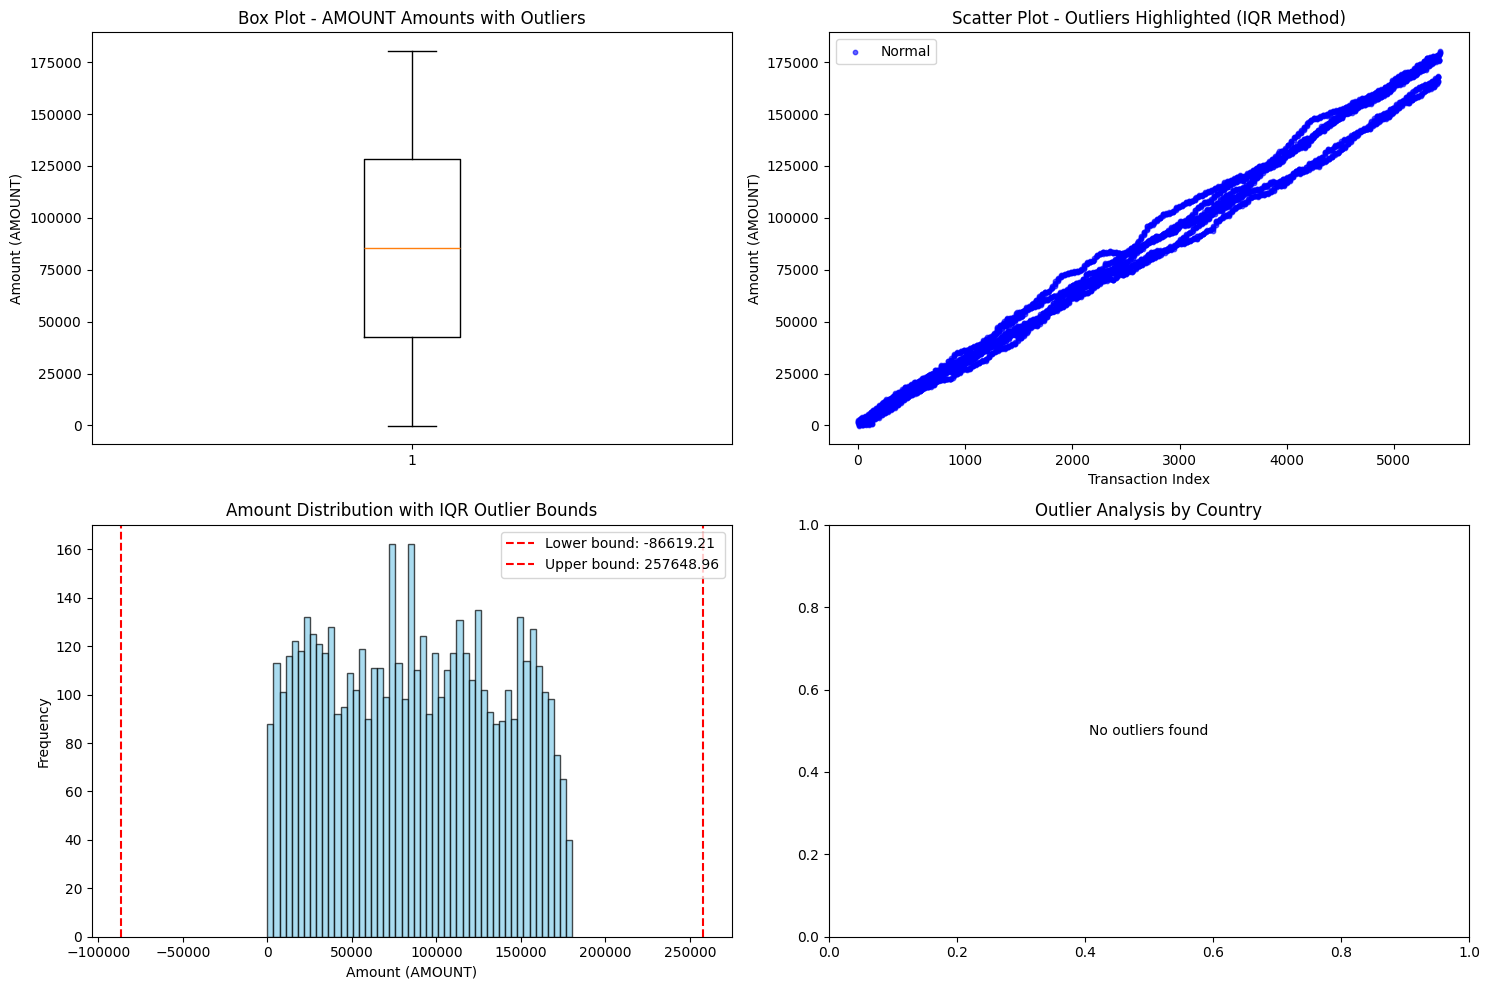


No outliers detected using IQR method.


In [12]:
# Outlier Detection
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np
import json

print("=== OUTLIER DETECTION ANALYSIS ===")

# Check if we need to create USD amounts
if 'amount_usd' not in accept_df.columns and 'amount' in accept_df.columns and 'rates' in accept_df.columns:
    print("Creating USD amounts using conversion rates...")
    
    def convert_to_usd(row):
        try:
            amount = float(row['amount'])
            currency = row['currency']
            rates_json = json.loads(row['rates'])
            
            if currency == 'USD':
                return amount
            elif currency in rates_json:
                return amount / rates_json[currency]
            else:
                return np.nan
        except (ValueError, json.JSONDecodeError, KeyError, TypeError):
            return np.nan
    
    accept_df['amount_usd'] = accept_df.apply(convert_to_usd, axis=1)
    amount_column = 'amount_usd'
    print(f"USD conversion completed. {accept_df['amount_usd'].isna().sum()} rows failed conversion.")
    
elif 'amount' in accept_df.columns:
    amount_column = 'amount'
    print("Using original amount column (currency-specific amounts)...")
else:
    print("No amount column found in the dataset.")
    amount_column = None

if amount_column and amount_column in accept_df.columns:
    amounts_clean = accept_df[amount_column].dropna()
    
    if len(amounts_clean) == 0:
        print("No valid amount data found after cleaning.")
    else:
        print(f"Analyzing {len(amounts_clean)} transactions with valid amounts.")
        
        Q1 = amounts_clean.quantile(0.25)
        Q3 = amounts_clean.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        iqr_outliers = amounts_clean[(amounts_clean < lower_bound) | (amounts_clean > upper_bound)]
        print(f"IQR Method: {len(iqr_outliers)} outliers ({len(iqr_outliers)/len(amounts_clean)*100:.2f}%)")
        
   
        z_scores = np.abs(stats.zscore(amounts_clean))
        zscore_outliers = amounts_clean[z_scores > 3]
        print(f"Z-score Method (>3): {len(zscore_outliers)} outliers ({len(zscore_outliers)/len(amounts_clean)*100:.2f}%)")
        

        amounts_reshaped = amounts_clean.values.reshape(-1, 1)
        iso_forest = IsolationForest(contamination=0.1, random_state=42)
        outlier_labels = iso_forest.fit_predict(amounts_reshaped)
        isolation_outliers = amounts_clean[outlier_labels == -1]
        print(f"Isolation Forest: {len(isolation_outliers)} outliers ({len(isolation_outliers)/len(amounts_clean)*100:.2f}%)")
        

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        

        axes[0,0].boxplot(amounts_clean, vert=True)
        axes[0,0].set_title(f'Box Plot - {amount_column.upper()} Amounts with Outliers')
        axes[0,0].set_ylabel(f'Amount ({amount_column.upper()})')
        

        normal_mask = ~amounts_clean.isin(iqr_outliers.values)
        outlier_mask = amounts_clean.isin(iqr_outliers.values)
        
        normal_indices = amounts_clean.index[normal_mask].tolist()
        outlier_indices = amounts_clean.index[outlier_mask].tolist()
        
        if normal_indices:
            axes[0,1].scatter(normal_indices, amounts_clean[normal_mask], alpha=0.6, label='Normal', color='blue', s=10)
        if outlier_indices:
            axes[0,1].scatter(outlier_indices, amounts_clean[outlier_mask], alpha=0.8, label='Outliers', color='red', s=20)
        axes[0,1].set_title('Scatter Plot - Outliers Highlighted (IQR Method)')
        axes[0,1].set_xlabel('Transaction Index')
        axes[0,1].set_ylabel(f'Amount ({amount_column.upper()})')
        axes[0,1].legend()
        

        axes[1,0].hist(amounts_clean, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1,0].axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
        axes[1,0].axvline(upper_bound, color='red', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
        axes[1,0].set_title('Amount Distribution with IQR Outlier Bounds')
        axes[1,0].set_xlabel(f'Amount ({amount_column.upper()})')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].legend()
        
   
        if 'country' in accept_df.columns:
            outlier_df = accept_df[accept_df[amount_column].isin(iqr_outliers)]
            outlier_by_country = outlier_df['country'].value_counts().head(10)
            if len(outlier_by_country) > 0:
                outlier_by_country.plot.bar(ax=axes[1,1])
                axes[1,1].set_title('Top 10 Countries by Outlier Count')
                axes[1,1].set_xlabel('Country')
                axes[1,1].set_ylabel('Number of Outliers')
                axes[1,1].tick_params(axis='x', rotation=45)
            else:
                axes[1,1].text(0.5, 0.5, 'No outliers found', ha='center', va='center')
                axes[1,1].set_title('Outlier Analysis by Country')
        
        plt.tight_layout()
        plt.show()
        

        if len(iqr_outliers) > 0:
            print(f"\n=== OUTLIER STATISTICS (IQR METHOD) ===")
            print(f"Smallest outlier: {iqr_outliers.min():.2f}")
            print(f"Largest outlier: {iqr_outliers.max():.2f}")
            print(f"Mean of outliers: {iqr_outliers.mean():.2f}")
            print(f"Median of outliers: {iqr_outliers.median():.2f}")
            

            print(f"\n=== IMPACT OF OUTLIERS ===")
            amounts_no_outliers = amounts_clean[~amounts_clean.isin(iqr_outliers)]
            print(f"Mean with outliers: {amounts_clean.mean():.2f}")
            print(f"Mean without outliers: {amounts_no_outliers.mean():.2f}")
            print(f"Difference: {amounts_clean.mean() - amounts_no_outliers.mean():.2f}")
            print(f"Std with outliers: {amounts_clean.std():.2f}")
            print(f"Std without outliers: {amounts_no_outliers.std():.2f}")
        else:
            print("\nNo outliers detected using IQR method.")
else:
    print("No amount column found in the dataset.")

=== CORRELATION ANALYSIS ===
Strong correlations (|r| > 0.5): 1
amount vs amount_usd: 0.733


/Users/odyssey/Downloads/deel/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/odyssey/Downloads/deel/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


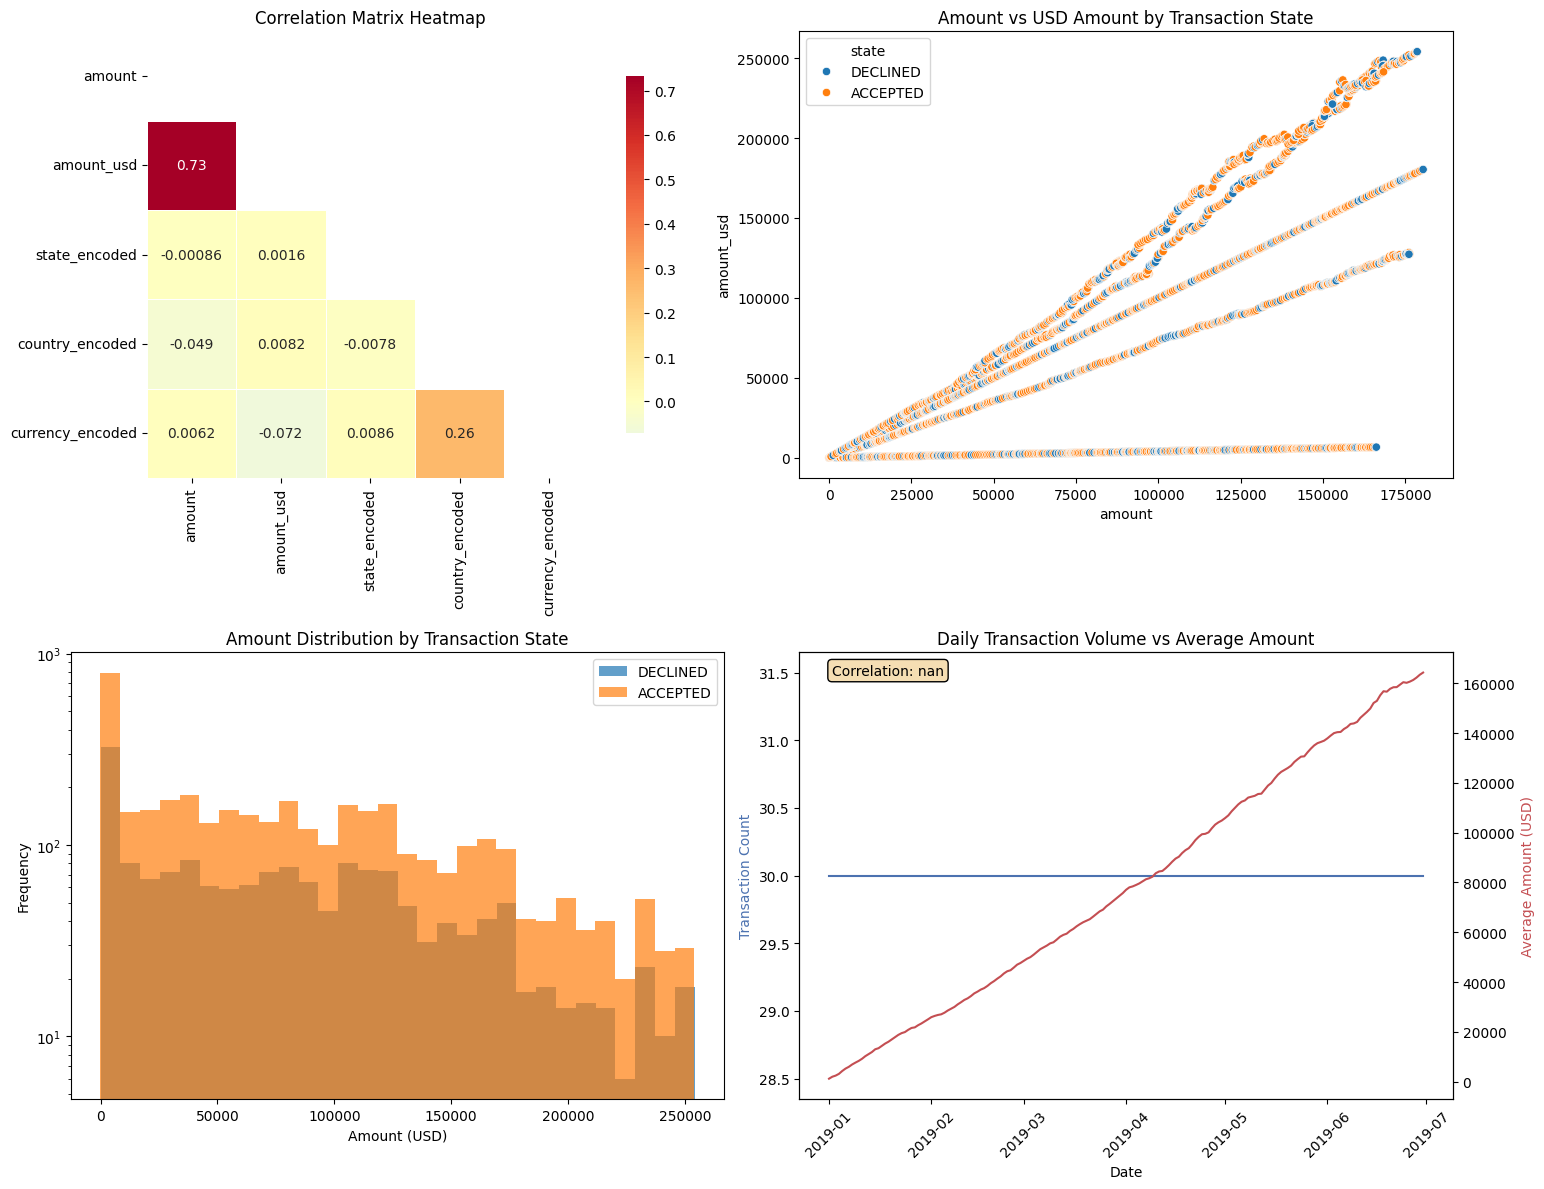

In [13]:
# Correlation Analysis
from sklearn.preprocessing import LabelEncoder

print("=== CORRELATION ANALYSIS ===")


numeric_df = accept_df.select_dtypes(include=[np.number]).copy()


categorical_cols = ['state', 'country', 'currency']
le = LabelEncoder()

correlation_df = numeric_df.copy()
for col in categorical_cols:
    if col in accept_df.columns:
        correlation_df[f'{col}_encoded'] = le.fit_transform(accept_df[col].fillna('Unknown'))


correlation_df = correlation_df.dropna(axis=1, how='all')


corr_matrix = correlation_df.corr()


fig, axes = plt.subplots(2, 2, figsize=(16, 12))


mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=axes[0,0])
axes[0,0].set_title('Correlation Matrix Heatmap')


strong_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:  
            strong_correlations.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

print(f"Strong correlations (|r| > 0.5): {len(strong_correlations)}")
for col1, col2, corr_val in strong_correlations:
    print(f"{col1} vs {col2}: {corr_val:.3f}")


key_vars = ['amount', 'amount_usd'] if 'amount_usd' in correlation_df.columns else ['amount']
if len(key_vars) > 1:

    plot_df = accept_df[key_vars + ['state']].dropna()
    sns.scatterplot(data=plot_df, x=key_vars[0], y=key_vars[1], hue='state', ax=axes[0,1])
    axes[0,1].set_title('Amount vs USD Amount by Transaction State')


if 'amount_usd' in accept_df.columns and 'state' in accept_df.columns:
    for state in accept_df['state'].unique():
        state_data = accept_df[accept_df['state'] == state]['amount_usd'].dropna()
        if len(state_data) > 0:
            axes[1,0].hist(state_data, alpha=0.7, label=state, bins=30)
    axes[1,0].set_title('Amount Distribution by Transaction State')
    axes[1,0].set_xlabel('Amount (USD)')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].legend()
    axes[1,0].set_yscale('log')


if 'date_time' in accept_df.columns and 'amount_usd' in accept_df.columns:

    daily_stats = accept_df.groupby(accept_df['date_time'].dt.date).agg({
        'amount_usd': ['count', 'mean', 'sum']
    }).reset_index()
    daily_stats.columns = ['date', 'transaction_count', 'avg_amount', 'total_amount']
    

    vol_amount_corr = daily_stats['transaction_count'].corr(daily_stats['avg_amount'])
    

    ax2 = axes[1,1]
    ax3 = ax2.twinx()
    
    line1 = ax2.plot(daily_stats['date'], daily_stats['transaction_count'], 'b-', label='Transaction Count')
    line2 = ax3.plot(daily_stats['date'], daily_stats['avg_amount'], 'r-', label='Average Amount')
    
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Transaction Count', color='b')
    ax3.set_ylabel('Average Amount (USD)', color='r')
    ax2.tick_params(axis='x', rotation=45)
    
    ax2.text(0.05, 0.95, f'Correlation: {vol_amount_corr:.3f}', 
             transform=ax2.transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))
    
    axes[1,1].set_title('Daily Transaction Volume vs Average Amount')

plt.tight_layout()
plt.show()

=== ADVANCED TIME SERIES ANALYSIS ===
=== STATISTICAL SIGNIFICANCE TESTS ===
Weekend vs Weekday Success Rate - Chi-square test p-value: 0.9258
Hourly Success Rate Variation - Chi-square test p-value: 0.8510


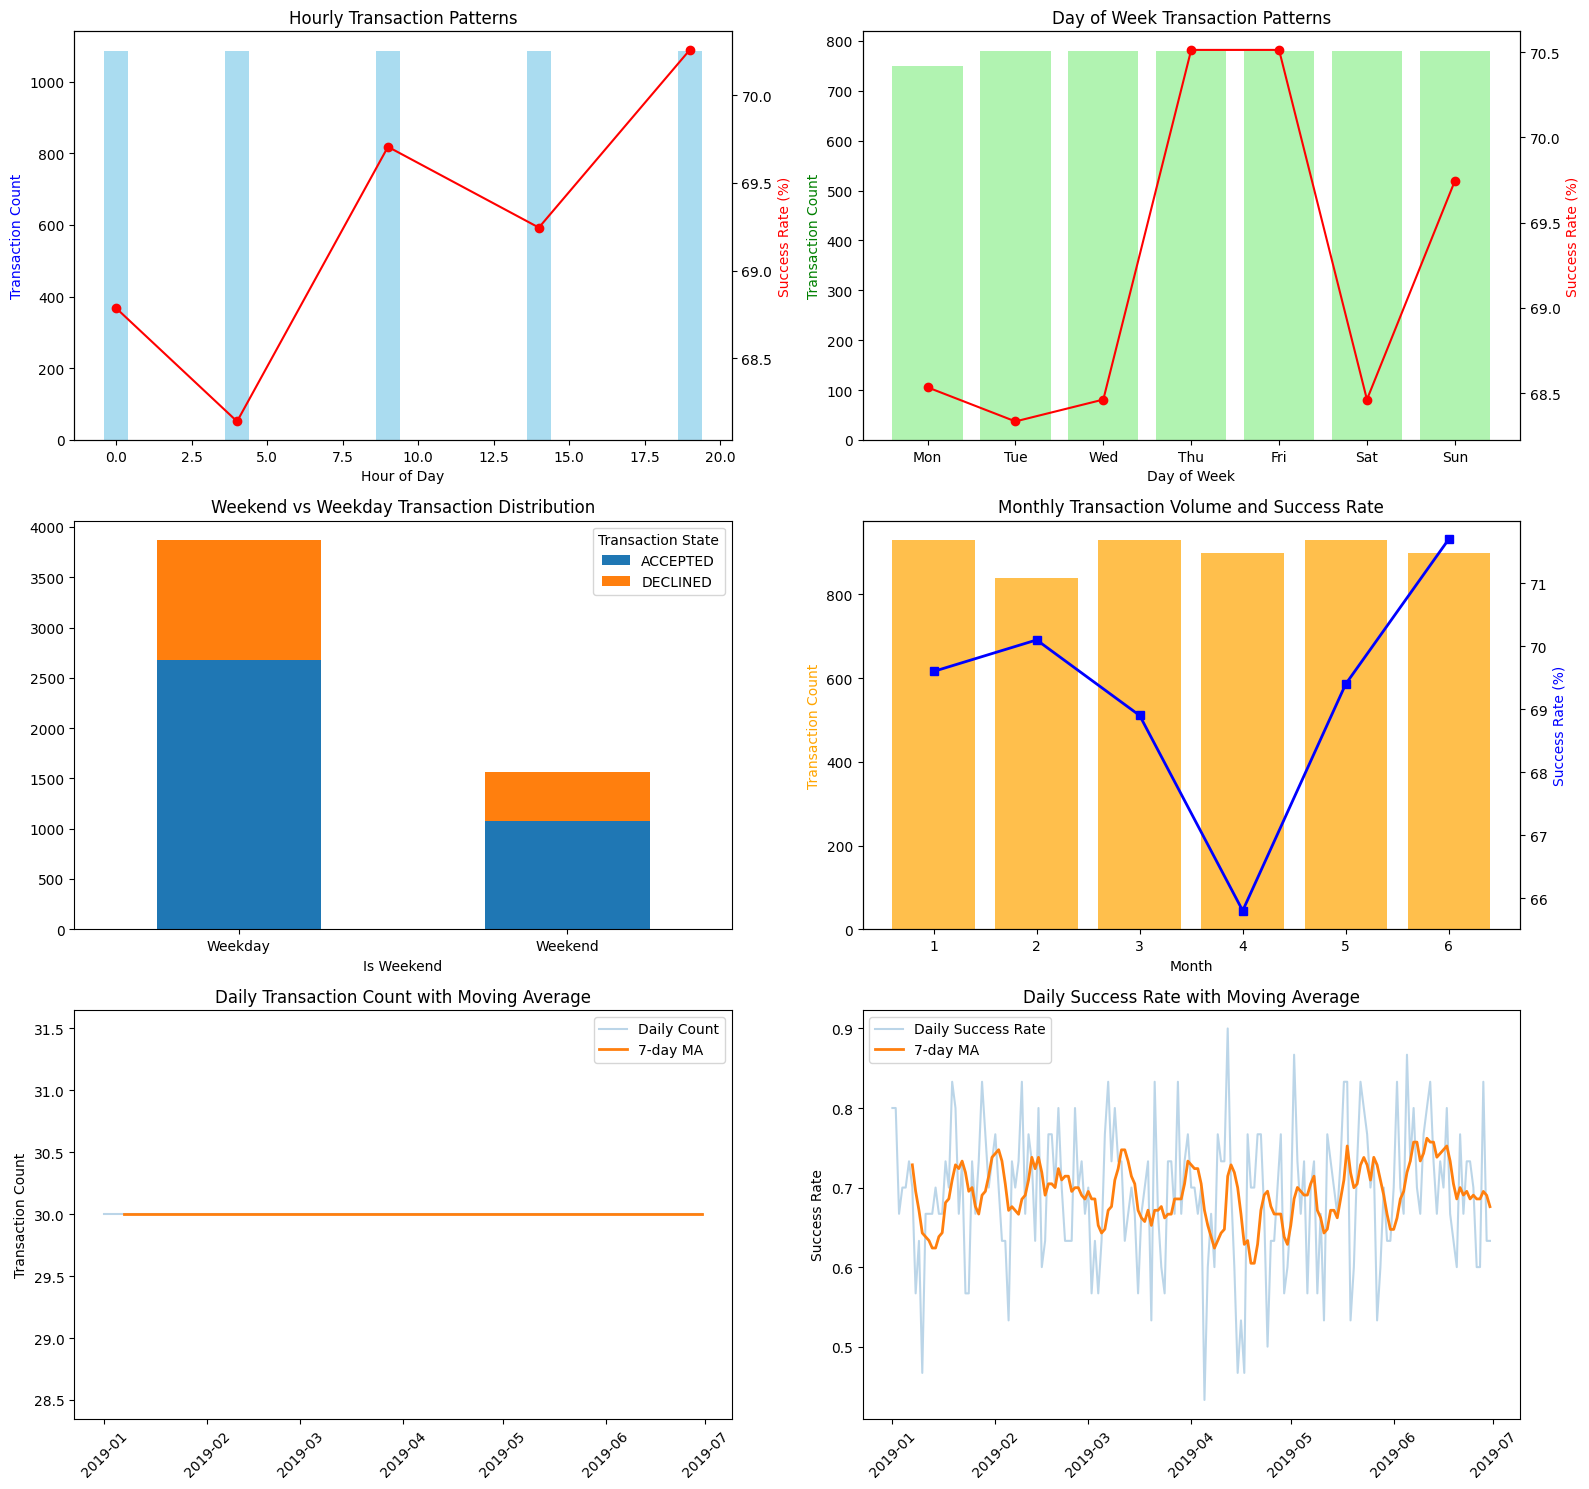


=== PEAK HOURS ANALYSIS ===
Top 3 busiest hours:
  Hour 00: 1086 transactions, 68.8% success rate
  Hour 04: 1086 transactions, 68.1% success rate
  Hour 09: 1086 transactions, 69.7% success rate

Top 3 quietest hours:
  Hour 00: 1086 transactions, 68.8% success rate
  Hour 04: 1086 transactions, 68.1% success rate
  Hour 09: 1086 transactions, 69.7% success rate


In [14]:
# Time Series Analysis
from scipy.stats import chi2_contingency

print("=== ADVANCED TIME SERIES ANALYSIS ===")

if 'date_time' in accept_df.columns:
    # Create time-based features
    accept_df['hour'] = accept_df['date_time'].dt.hour
    accept_df['day_of_week'] = accept_df['date_time'].dt.dayofweek
    accept_df['day_of_month'] = accept_df['date_time'].dt.day
    accept_df['month'] = accept_df['date_time'].dt.month
    accept_df['is_weekend'] = accept_df['day_of_week'].isin([5, 6])
    
    fig, axes = plt.subplots(3, 2, figsize=(16, 15))
    
    # Hourly transaction patterns
    hourly_counts = accept_df.groupby('hour').size()
    hourly_success_rate = accept_df.groupby('hour')['state'].apply(lambda x: (x == 'ACCEPTED').mean())
    
    ax1 = axes[0,0]
    ax1_twin = ax1.twinx()
    
    bars = ax1.bar(hourly_counts.index, hourly_counts.values, alpha=0.7, color='skyblue', label='Transaction Count')
    line = ax1_twin.plot(hourly_success_rate.index, hourly_success_rate.values * 100, 
                         color='red', marker='o', label='Success Rate %')
    
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Transaction Count', color='blue')
    ax1_twin.set_ylabel('Success Rate (%)', color='red')
    ax1.set_title('Hourly Transaction Patterns')
    
    # Day of week analysis
    dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    dow_counts = accept_df.groupby('day_of_week').size()
    dow_success_rate = accept_df.groupby('day_of_week')['state'].apply(lambda x: (x == 'ACCEPTED').mean())
    
    ax2 = axes[0,1]
    ax2_twin = ax2.twinx()
    
    bars = ax2.bar(range(7), dow_counts.values, alpha=0.7, color='lightgreen')
    line = ax2_twin.plot(range(7), dow_success_rate.values * 100, color='red', marker='o')
    
    ax2.set_xlabel('Day of Week')
    ax2.set_ylabel('Transaction Count', color='green')
    ax2_twin.set_ylabel('Success Rate (%)', color='red')
    ax2.set_xticks(range(7))
    ax2.set_xticklabels(dow_names)
    ax2.set_title('Day of Week Transaction Patterns')
    
    # Weekend vs Weekday analysis
    weekend_analysis = accept_df.groupby(['is_weekend', 'state']).size().unstack(fill_value=0)
    weekend_analysis.plot(kind='bar', ax=axes[1,0], stacked=True)
    axes[1,0].set_title('Weekend vs Weekday Transaction Distribution')
    axes[1,0].set_xlabel('Is Weekend')
    axes[1,0].set_xticklabels(['Weekday', 'Weekend'], rotation=0)
    axes[1,0].legend(title='Transaction State')
    
    # Monthly trends
    monthly_stats = accept_df.groupby('month').agg({
        'state': lambda x: (x == 'ACCEPTED').mean(),
        'amount_usd': ['count', 'mean', 'sum']
    }).round(3)
    
    monthly_stats.columns = ['success_rate', 'transaction_count', 'avg_amount', 'total_amount']
    
    ax3 = axes[1,1]
    ax3_twin = ax3.twinx()
    
    bars = ax3.bar(monthly_stats.index, monthly_stats['transaction_count'], alpha=0.7, color='orange')
    line = ax3_twin.plot(monthly_stats.index, monthly_stats['success_rate'] * 100, 
                         color='blue', marker='s', linewidth=2)
    
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Transaction Count', color='orange')
    ax3_twin.set_ylabel('Success Rate (%)', color='blue')
    ax3.set_title('Monthly Transaction Volume and Success Rate')
    

    print("=== STATISTICAL SIGNIFICANCE TESTS ===")
    

    contingency_table = pd.crosstab(accept_df['is_weekend'], accept_df['state'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Weekend vs Weekday Success Rate - Chi-square test p-value: {p_value:.4f}")
    

    hourly_contingency = pd.crosstab(accept_df['hour'], accept_df['state'])
    chi2_hour, p_value_hour, dof_hour, expected_hour = chi2_contingency(hourly_contingency)
    print(f"Hourly Success Rate Variation - Chi-square test p-value: {p_value_hour:.4f}")
    

    daily_metrics = accept_df.groupby(accept_df['date_time'].dt.date).agg({
        'state': ['count', lambda x: (x == 'ACCEPTED').mean()],
        'amount_usd': 'sum'
    }).round(3)
    
    daily_metrics.columns = ['daily_count', 'daily_success_rate', 'daily_amount']
    daily_metrics.index = pd.to_datetime(daily_metrics.index)
    

    daily_metrics['count_7day_ma'] = daily_metrics['daily_count'].rolling(window=7).mean()
    daily_metrics['success_7day_ma'] = daily_metrics['daily_success_rate'].rolling(window=7).mean()
    

    axes[2,0].plot(daily_metrics.index, daily_metrics['daily_count'], alpha=0.3, label='Daily Count')
    axes[2,0].plot(daily_metrics.index, daily_metrics['count_7day_ma'], label='7-day MA', linewidth=2)
    axes[2,0].set_title('Daily Transaction Count with Moving Average')
    axes[2,0].set_ylabel('Transaction Count')
    axes[2,0].legend()
    axes[2,0].tick_params(axis='x', rotation=45)
    
    axes[2,1].plot(daily_metrics.index, daily_metrics['daily_success_rate'], alpha=0.3, label='Daily Success Rate')
    axes[2,1].plot(daily_metrics.index, daily_metrics['success_7day_ma'], label='7-day MA', linewidth=2)
    axes[2,1].set_title('Daily Success Rate with Moving Average')
    axes[2,1].set_ylabel('Success Rate')
    axes[2,1].legend()
    axes[2,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    
    peak_hours = hourly_counts.nlargest(3)
    low_hours = hourly_counts.nsmallest(3)
    
    print(f"\n=== PEAK HOURS ANALYSIS ===")
    print("Top 3 busiest hours:")
    for hour, count in peak_hours.items():
        success_rate = hourly_success_rate[hour] * 100
        print(f"  Hour {hour:02d}: {count} transactions, {success_rate:.1f}% success rate")
    
    print("\nTop 3 quietest hours:")
    for hour, count in low_hours.items():
        success_rate = hourly_success_rate[hour] * 100
        print(f"  Hour {hour:02d}: {count} transactions, {success_rate:.1f}% success rate")

=== GEOGRAPHIC ANALYSIS ===
Countries with significant volume (≥100 transactions): 6

Top 10 countries by total volume:


,total_transactions,acceptance_rate,decline_rate,total_volume_usd,avg_amount_usd,median_amount_usd
country,,,,,,
FR,905,0.691,0.309,1.055864e+08,116670.097,107563.246
UK,905,0.715,0.285,1.028827e+08,113682.564,109607.530
AE,905,0.678,0.322,8.291463e+07,91618.378,96553.350
US,905,0.672,0.328,7.824142e+07,86454.609,82128.160
CA,905,0.686,0.314,5.755635e+07,63598.177,63087.420
MX,905,0.712,0.288,3.089950e+06,3414.309,3527.113



=== HIGH RISK COUNTRIES ===
Countries with high volume but low acceptance rate: 1


,total_transactions,acceptance_rate,decline_rate,total_volume_usd,avg_amount_usd,median_amount_usd
country,,,,,,
AE,905,0.678,0.322,82914631.88,91618.378,96553.35



=== CURRENCY ANALYSIS ===
Countries using multiple currencies: 0


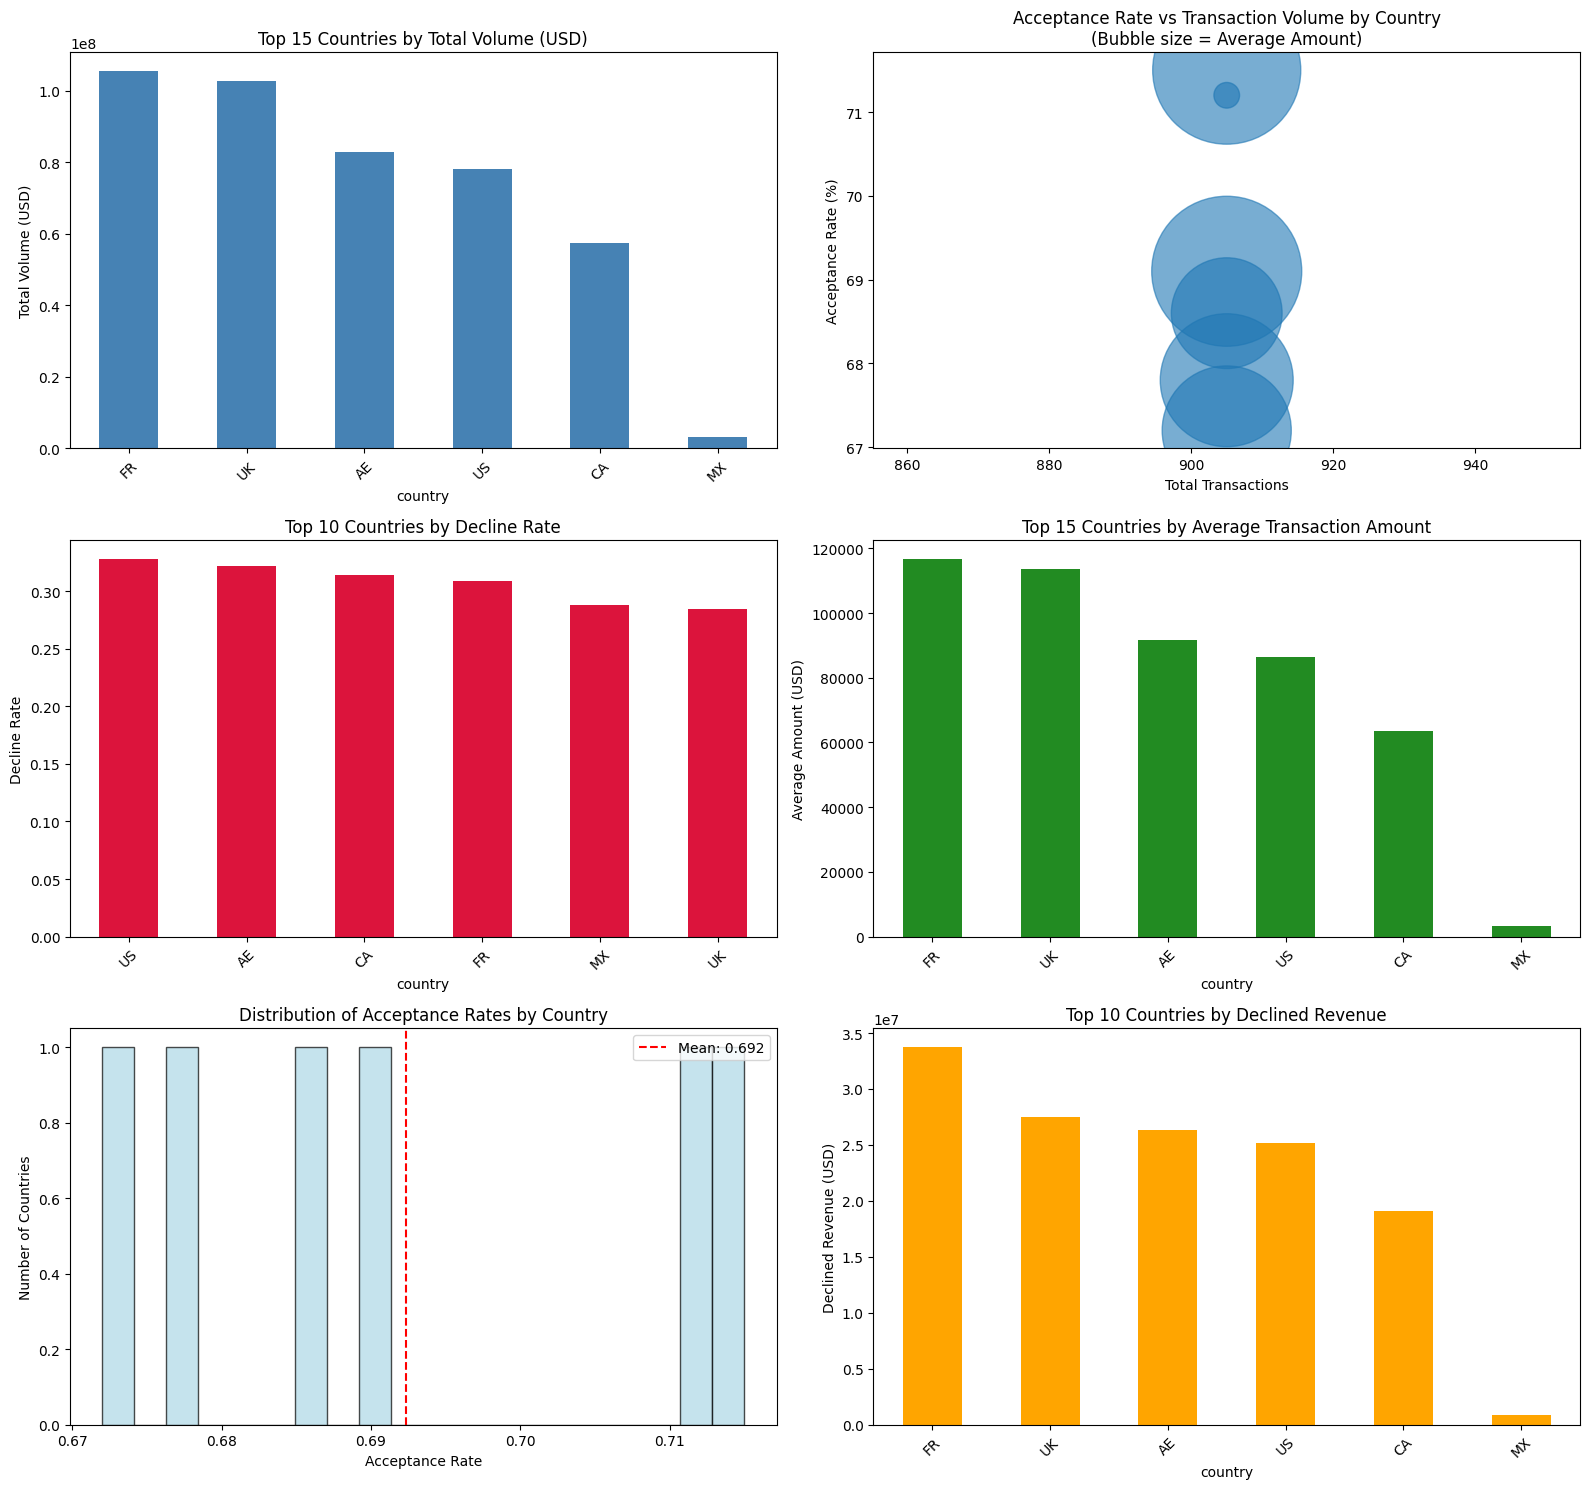


=== COUNTRY PERFORMANCE SUMMARY ===
Total countries: 6
Countries with ≥100 transactions: 6
Average acceptance rate: 0.692
Std deviation of acceptance rates: 0.018
Best performing country: UK (0.715)
Worst performing country: US (0.672)


In [15]:
# Geographic Analysis

print("=== GEOGRAPHIC ANALYSIS ===")

if 'country' in accept_df.columns:
    country_metrics = accept_df.groupby('country').agg({
        'state': ['count', lambda x: (x == 'ACCEPTED').mean(), lambda x: (x == 'DECLINED').mean()],
        'amount_usd': ['sum', 'mean', 'median']
    }).round(3)
    
    country_metrics.columns = ['total_transactions', 'acceptance_rate', 'decline_rate', 
                              'total_volume_usd', 'avg_amount_usd', 'median_amount_usd']
    
 
    significant_countries = country_metrics[country_metrics['total_transactions'] >= 100].copy()
    significant_countries = significant_countries.sort_values('total_volume_usd', ascending=False)
    
    print(f"Countries with significant volume (≥100 transactions): {len(significant_countries)}")
    print("\nTop 10 countries by total volume:")
    display(significant_countries.head(10))
    
    fig, axes = plt.subplots(3, 2, figsize=(16, 15))
    

    top_volume_countries = significant_countries.head(15)
    top_volume_countries['total_volume_usd'].plot(kind='bar', ax=axes[0,0], color='steelblue')
    axes[0,0].set_title('Top 15 Countries by Total Volume (USD)')
    axes[0,0].set_ylabel('Total Volume (USD)')
    axes[0,0].tick_params(axis='x', rotation=45)
    

    axes[0,1].scatter(significant_countries['total_transactions'], 
                     significant_countries['acceptance_rate'] * 100, 
                     s=significant_countries['avg_amount_usd']/10, alpha=0.6)
    axes[0,1].set_xlabel('Total Transactions')
    axes[0,1].set_ylabel('Acceptance Rate (%)')
    axes[0,1].set_title('Acceptance Rate vs Transaction Volume by Country\n(Bubble size = Average Amount)')
    

    high_decline_countries = significant_countries.nlargest(10, 'decline_rate')
    high_decline_countries['decline_rate'].plot(kind='bar', ax=axes[1,0], color='crimson')
    axes[1,0].set_title('Top 10 Countries by Decline Rate')
    axes[1,0].set_ylabel('Decline Rate')
    axes[1,0].tick_params(axis='x', rotation=45)
    

    top_amount_countries = significant_countries.nlargest(15, 'avg_amount_usd')
    top_amount_countries['avg_amount_usd'].plot(kind='bar', ax=axes[1,1], color='forestgreen')
    axes[1,1].set_title('Top 15 Countries by Average Transaction Amount')
    axes[1,1].set_ylabel('Average Amount (USD)')
    axes[1,1].tick_params(axis='x', rotation=45)
    

    risk_threshold_volume = significant_countries['total_volume_usd'].quantile(0.6)
    risk_threshold_acceptance = significant_countries['acceptance_rate'].quantile(0.4)
    
    high_risk_countries = significant_countries[
        (significant_countries['total_volume_usd'] >= risk_threshold_volume) &
        (significant_countries['acceptance_rate'] <= risk_threshold_acceptance)
    ]
    
    print(f"\n=== HIGH RISK COUNTRIES ===")
    print(f"Countries with high volume but low acceptance rate: {len(high_risk_countries)}")
    if len(high_risk_countries) > 0:
        display(high_risk_countries)
    

    axes[2,0].hist(significant_countries['acceptance_rate'], bins=20, alpha=0.7, color='lightblue', edgecolor='black')
    axes[2,0].axvline(significant_countries['acceptance_rate'].mean(), color='red', linestyle='--', 
                     label=f'Mean: {significant_countries["acceptance_rate"].mean():.3f}')
    axes[2,0].set_title('Distribution of Acceptance Rates by Country')
    axes[2,0].set_xlabel('Acceptance Rate')
    axes[2,0].set_ylabel('Number of Countries')
    axes[2,0].legend()
    

    if 'currency' in accept_df.columns:
        country_currency = accept_df.groupby(['country', 'currency']).size().unstack(fill_value=0)
        
        multi_currency_countries = country_currency[country_currency.gt(0).sum(axis=1) > 1]
        
        print(f"\n=== CURRENCY ANALYSIS ===")
        print(f"Countries using multiple currencies: {len(multi_currency_countries)}")
        
        if len(multi_currency_countries) > 0:
            print("Top countries with multiple currencies:")
            for country in multi_currency_countries.head().index:
                currencies = country_currency.loc[country][country_currency.loc[country] > 0]
                print(f"  {country}: {list(currencies.index)} (transactions: {list(currencies.values)})")
    

    performance_by_state = accept_df.groupby(['country', 'state'])['amount_usd'].agg(['sum', 'mean', 'count']).unstack(fill_value=0)
    
    if 'ACCEPTED' in accept_df['state'].values and 'DECLINED' in accept_df['state'].values:
        declined_revenue = performance_by_state[('sum', 'DECLINED')]
        accepted_revenue = performance_by_state[('sum', 'ACCEPTED')]
        
        revenue_impact = pd.DataFrame({
            'accepted_revenue': accepted_revenue,
            'declined_revenue': declined_revenue,
            'total_potential': accepted_revenue + declined_revenue
        }).fillna(0)
        
        revenue_impact['revenue_loss_pct'] = (revenue_impact['declined_revenue'] / 
                                            revenue_impact['total_potential'] * 100).fillna(0)
        
        top_revenue_loss = revenue_impact.nlargest(10, 'declined_revenue')
        top_revenue_loss['declined_revenue'].plot(kind='bar', ax=axes[2,1], color='orange')
        axes[2,1].set_title('Top 10 Countries by Declined Revenue')
        axes[2,1].set_ylabel('Declined Revenue (USD)')
        axes[2,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    

    print(f"\n=== COUNTRY PERFORMANCE SUMMARY ===")
    print(f"Total countries: {len(country_metrics)}")
    print(f"Countries with ≥100 transactions: {len(significant_countries)}")
    print(f"Average acceptance rate: {significant_countries['acceptance_rate'].mean():.3f}")
    print(f"Std deviation of acceptance rates: {significant_countries['acceptance_rate'].std():.3f}")
    print(f"Best performing country: {significant_countries.nlargest(1, 'acceptance_rate').index[0]} ({significant_countries['acceptance_rate'].max():.3f})")
    print(f"Worst performing country: {significant_countries.nsmallest(1, 'acceptance_rate').index[0]} ({significant_countries['acceptance_rate'].min():.3f})")

=== CURRENCY AND EXCHANGE RATE ANALYSIS ===
Total currencies processed: 5
Top 10 currencies by transaction count:
currency
USD    1810
MXN     905
GBP     905
EUR     905
CAD     905
Name: count, dtype: int64


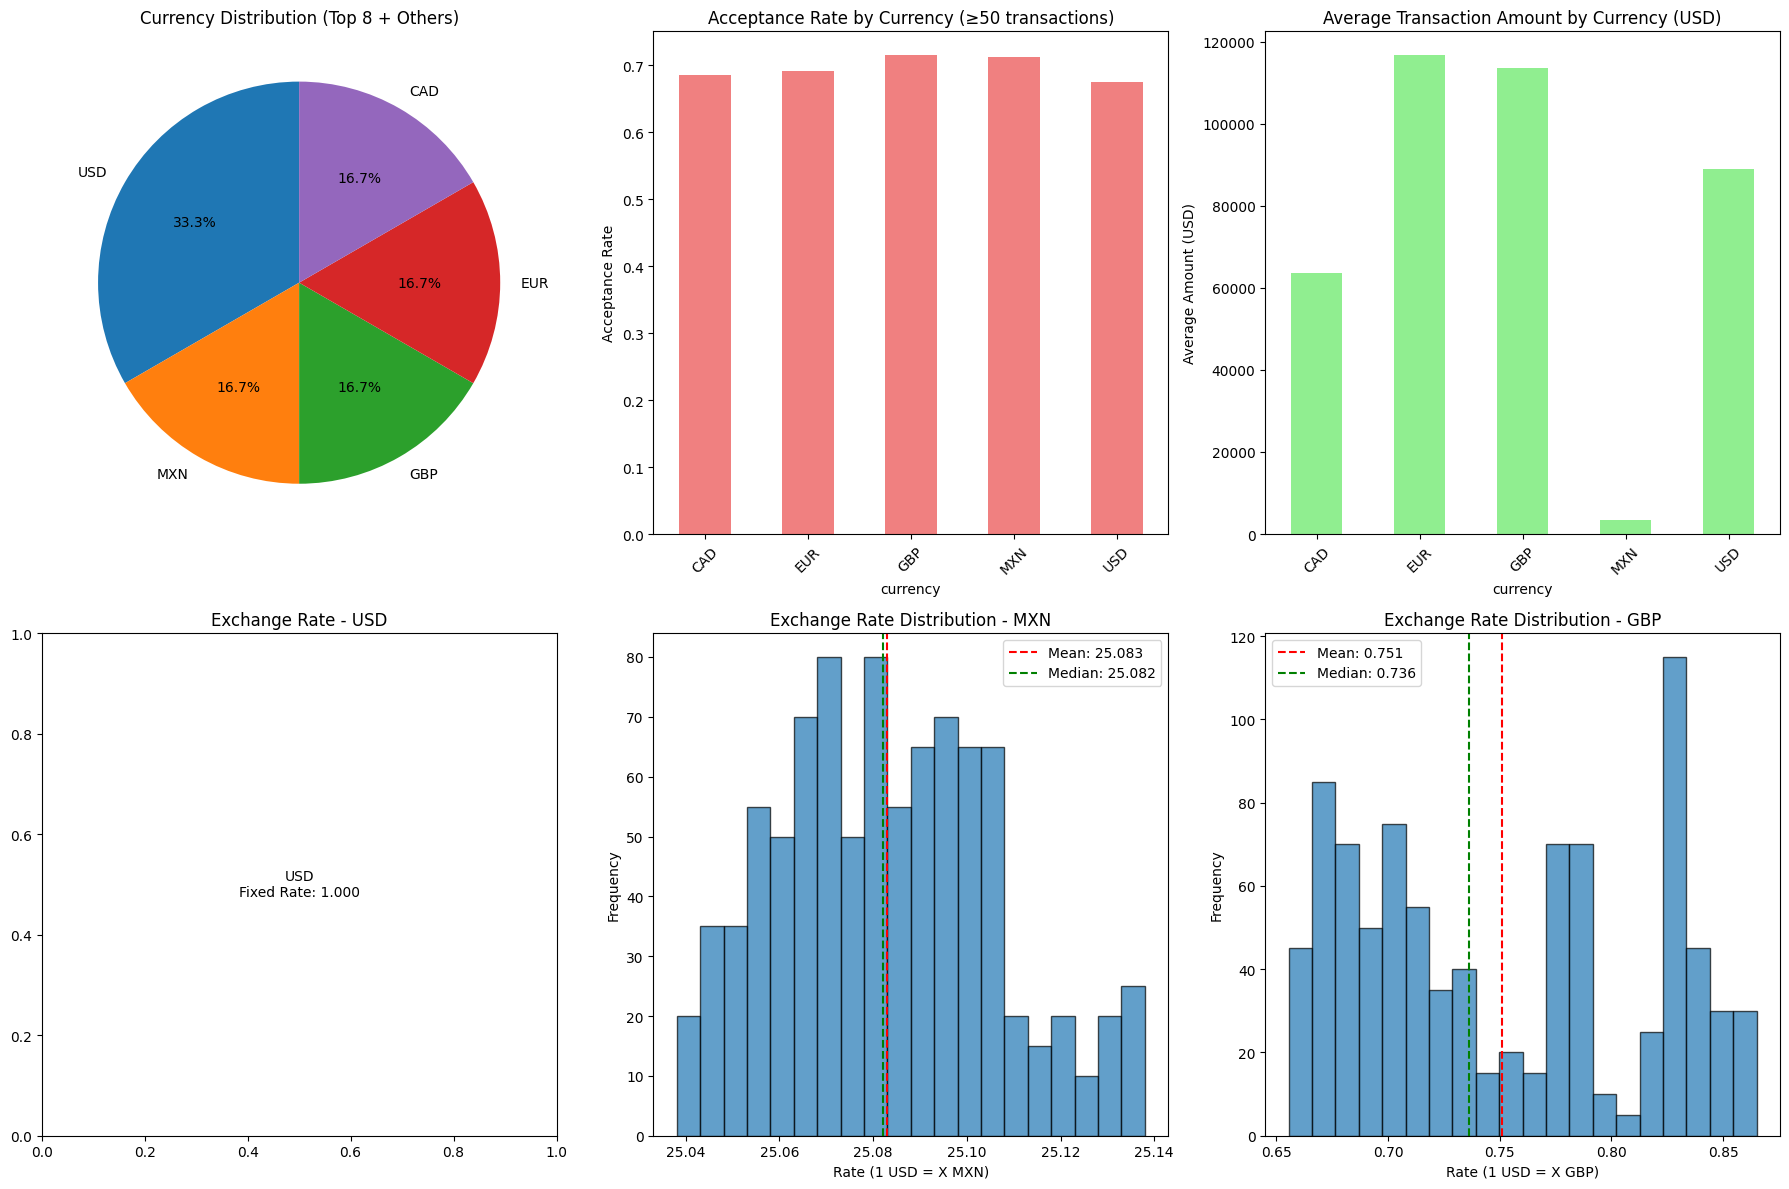


=== EXCHANGE RATE STABILITY ANALYSIS ===
USD: Mean rate = 1.0000, Std = 0.0000, CV = 0.0000
MXN: Mean rate = 25.0830, Std = 0.0232, CV = 0.0009
GBP: Mean rate = 0.7510, Std = 0.0639, CV = 0.0851
EUR: Mean rate = 0.8075, Std = 0.0764, CV = 0.0946
CAD: Mean rate = 1.3990, Std = 0.0235, CV = 0.0168

=== CURRENCY IMPACT ON ACCEPTANCE ===
Best performing currencies:
  GBP: 0.715 acceptance rate (905 transactions)
  MXN: 0.712 acceptance rate (905 transactions)
  EUR: 0.691 acceptance rate (905 transactions)

Worst performing currencies:
  EUR: 0.691 acceptance rate (905 transactions)
  CAD: 0.686 acceptance rate (905 transactions)
  USD: 0.675 acceptance rate (1810 transactions)
CURRENCY CONCENTRATION
Top 5 currencies represent 100.0% of all transactions
Only 5 currencies available. Top 5 currencies represent 100.0% of all transactions
Currency Herfindahl Index: 0.2222 (0=dispersed, 1=concentrated)


In [16]:
# Currency Analysis

print("=== CURRENCY AND EXCHANGE RATE ANALYSIS ===")

if 'currency' in accept_df.columns and 'rates' in accept_df.columns:
  
    currency_dist = accept_df['currency'].value_counts()
    print(f"Total currencies processed: {len(currency_dist)}")
    print(f"Top 10 currencies by transaction count:")
    print(currency_dist.head(10))
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    top_currencies = currency_dist.head(8)
    other_count = currency_dist[8:].sum()
    if other_count > 0:
        plot_data = pd.concat([top_currencies, pd.Series({'Others': other_count})])
    else:
        plot_data = top_currencies
    
    axes[0,0].pie(plot_data.values, labels=plot_data.index, autopct='%1.1f%%', startangle=90)
    axes[0,0].set_title('Currency Distribution (Top 8 + Others)')
    

    currency_performance = accept_df.groupby('currency').agg({
        'state': ['count', lambda x: (x == 'ACCEPTED').mean()],
        'amount_usd': ['sum', 'mean']
    }).round(3)
    
    currency_performance.columns = ['transaction_count', 'acceptance_rate', 'total_volume_usd', 'avg_amount_usd']
    significant_currencies = currency_performance[currency_performance['transaction_count'] >= 50]
    

    significant_currencies['acceptance_rate'].plot(kind='bar', ax=axes[0,1], color='lightcoral')
    axes[0,1].set_title('Acceptance Rate by Currency (≥50 transactions)')
    axes[0,1].set_ylabel('Acceptance Rate')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    significant_currencies['avg_amount_usd'].plot(kind='bar', ax=axes[0,2], color='lightgreen')
    axes[0,2].set_title('Average Transaction Amount by Currency (USD)')
    axes[0,2].set_ylabel('Average Amount (USD)')
    axes[0,2].tick_params(axis='x', rotation=45)
    

    def extract_rate(rates_str, currency):
        try:
            rates_dict = json.loads(rates_str) if isinstance(rates_str, str) else rates_str
            return rates_dict.get(currency, np.nan)
        except:
            return np.nan
    
    major_currencies = currency_dist.head(5).index
    exchange_rates = {}
    
    for currency in major_currencies:
        currency_data = accept_df[accept_df['currency'] == currency].copy()
        currency_data['exchange_rate'] = currency_data.apply(
            lambda row: extract_rate(row['rates'], currency), axis=1
        )
        exchange_rates[currency] = currency_data['exchange_rate'].dropna()
    
    for i, (currency, rates) in enumerate(exchange_rates.items()):
        if len(rates) > 0 and i < 3:  
            row = 1 
            col = i
            if rates.nunique() > 1: 
                axes[row, col].hist(rates, bins=20, alpha=0.7, edgecolor='black')
                axes[row, col].set_title(f'Exchange Rate Distribution - {currency}')
                axes[row, col].set_xlabel(f'Rate (1 USD = X {currency})')
                axes[row, col].set_ylabel('Frequency')
                axes[row, col].axvline(rates.mean(), color='red', linestyle='--', 
                                     label=f'Mean: {rates.mean():.3f}')
                axes[row, col].axvline(rates.median(), color='green', linestyle='--', 
                                     label=f'Median: {rates.median():.3f}')
                axes[row, col].legend()
            else:
                if len(rates) > 0:
                    axes[row, col].text(0.5, 0.5, f'{currency}\nFixed Rate: {rates.iloc[0]:.3f}', 
                                      ha='center', va='center', transform=axes[row, col].transAxes)
                    axes[row, col].set_title(f'Exchange Rate - {currency}')
                else:
                    axes[row, col].text(0.5, 0.5, f'{currency}\nNo Data', 
                                      ha='center', va='center', transform=axes[row, col].transAxes)
                    axes[row, col].set_title(f'Exchange Rate - {currency}')
    

    for i in range(len(exchange_rates), 3):
        axes[1, i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n=== EXCHANGE RATE STABILITY ANALYSIS ===")
    for currency, rates in exchange_rates.items():
        if len(rates) > 1:
            cv = rates.std() / rates.mean()  # Coefficient of variation
            print(f"{currency}: Mean rate = {rates.mean():.4f}, "
                  f"Std = {rates.std():.4f}, CV = {cv:.4f}")
    
    print(f"\n=== CURRENCY IMPACT ON ACCEPTANCE ===")
    currency_acceptance = significant_currencies.sort_values('acceptance_rate', ascending=False)
    
    print("Best performing currencies:")
    for currency in currency_acceptance.head(3).index:
        acc_rate = currency_acceptance.loc[currency, 'acceptance_rate']
        count = currency_acceptance.loc[currency, 'transaction_count']
        print(f"  {currency}: {acc_rate:.3f} acceptance rate ({count} transactions)")
    
    print("\nWorst performing currencies:")
    for currency in currency_acceptance.tail(3).index:
        acc_rate = currency_acceptance.loc[currency, 'acceptance_rate']
        count = currency_acceptance.loc[currency, 'transaction_count']
        print(f"  {currency}: {acc_rate:.3f} acceptance rate ({count} transactions)")
    
    print("CURRENCY CONCENTRATION")
total_transactions = len(accept_df)

currency_cumulative = currency_dist.cumsum() / total_transactions * 100

print(f"Top 5 currencies represent {currency_cumulative.iloc[4]:.1f}% of all transactions")
if len(currency_cumulative) >= 10:
    print(f"Top 10 currencies represent {currency_cumulative.iloc[9]:.1f}% of all transactions")
else:
    print(f"Only {len(currency_cumulative)} currencies available. Top {len(currency_cumulative)} currencies represent {currency_cumulative.iloc[-1]:.1f}% of all transactions")

currency_shares = currency_dist / total_transactions
hhi = (currency_shares ** 2).sum()
print(f"Currency Herfindahl Index: {hhi:.4f} (0=dispersed, 1=concentrated)")

CHARGEBACK ANALYSIS
 IMPORTANT: Chargebacks typically occur 30-180 days after the original transaction.
   This means:
   • Recent transactions may not yet show chargebacks that will eventually occur
   • Chargeback rates for recent periods may appear artificially low
   • True chargeback rates are best measured on transactions aged >6 months
   • Current analysis may underestimate actual chargeback exposure

Total chargeback records: 5430
Chargeback dataset columns: ['external_ref', 'status', 'source', 'chargeback']

Chargeback distribution:
chargeback
False    5207
True      223
Name: count, dtype: int64
Actual chargebacks (chargeback=True): 223

=== CHARGEBACK METRICS ===
Total accepted transactions: 3,759
Total actual chargebacks (chargeback=True): 223
Overall chargeback rate: 0.0593 (5.93%)
 Note: This rate may increase as pending chargebacks are processed

Top 5 countries by chargeback rate (≥50 transactions):
  CA: 0.0453 (41/905)
  MX: 0.0453 (41/905)
  AE: 0.0442 (40/905)
  US

/var/folders/dv/r84qbv2j0110w8bj8j4pb9240000gn/T/ipykernel_95516/101957867.py:125: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = merged_detailed.groupby(pd.cut(merged_detailed['transaction_age_days'],
/var/folders/dv/r84qbv2j0110w8bj8j4pb9240000gn/T/ipykernel_95516/101957867.py:263: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_cb = merged_detailed.groupby(merged_detailed['date_time'].dt.to_period('M')).agg({


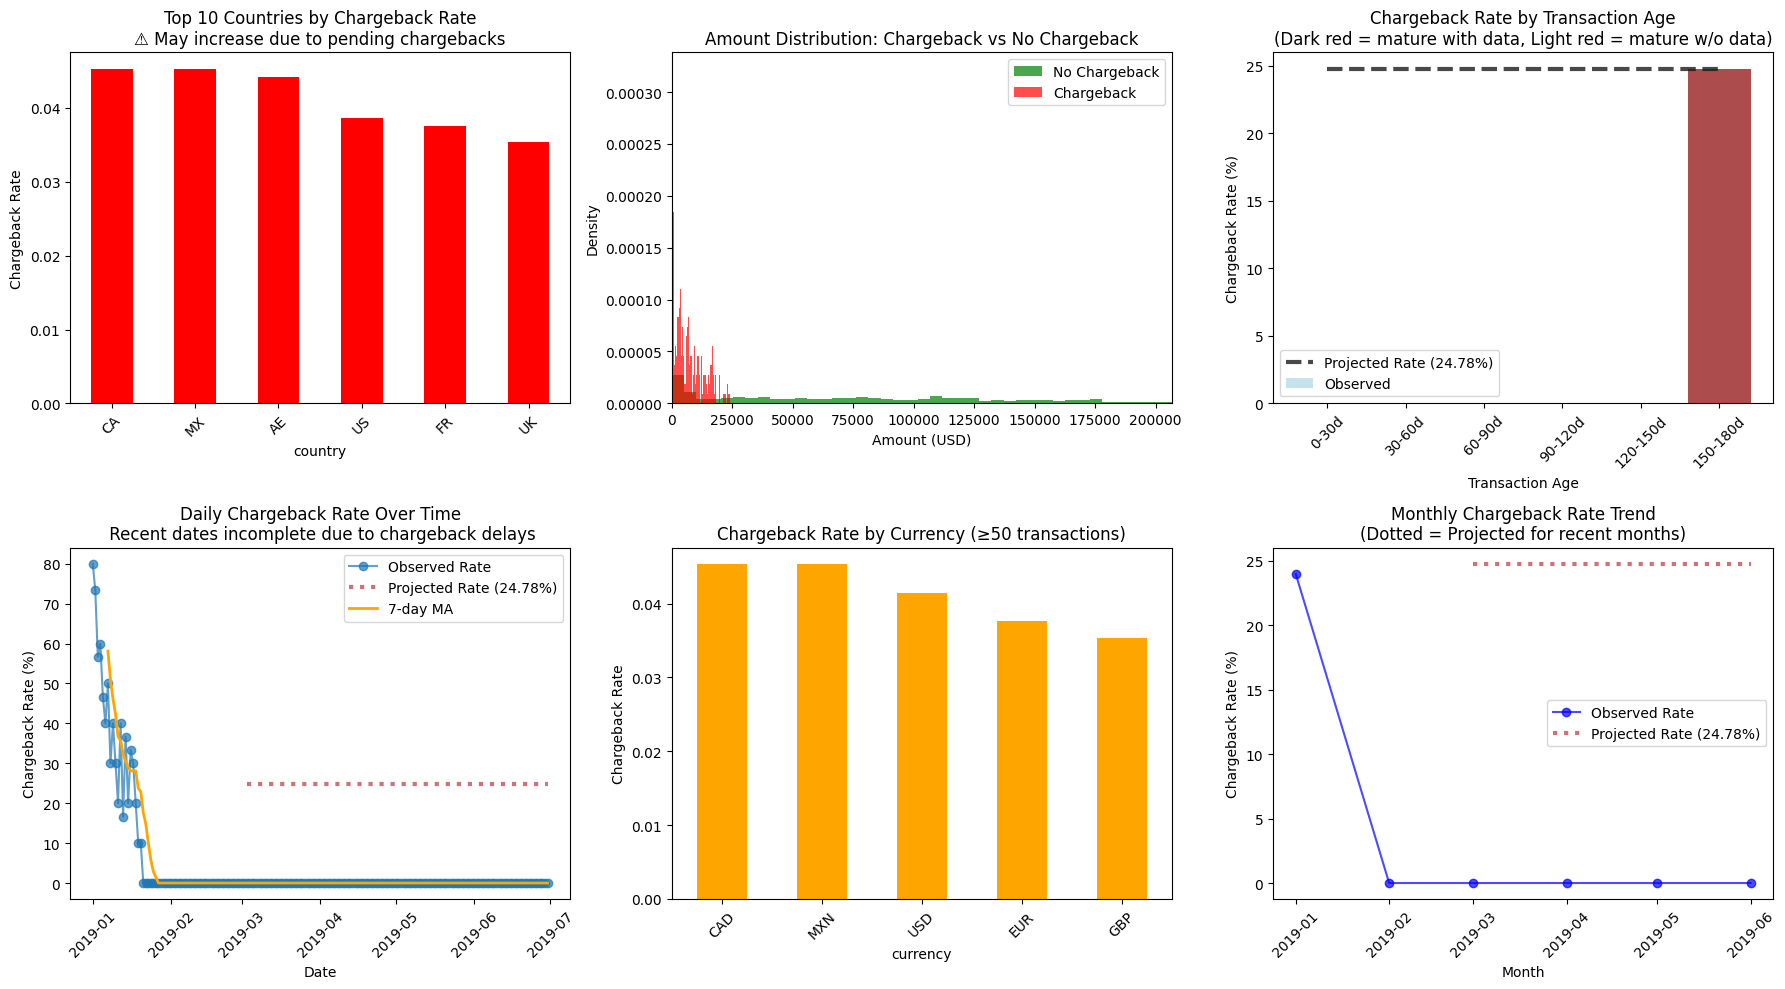


=== ACCEPTANCE vs CHARGEBACK CORRELATION ===
Correlation between acceptance rate and chargeback rate: -0.1595


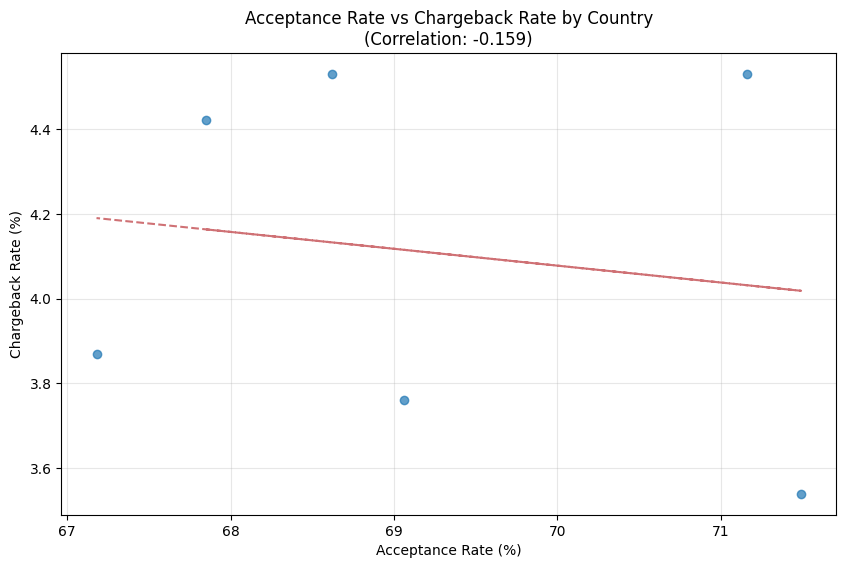

In [17]:
# Chargeback Analysis

print("CHARGEBACK ANALYSIS")

print(" IMPORTANT: Chargebacks typically occur 30-180 days after the original transaction.")
print("   This means:")
print("   • Recent transactions may not yet show chargebacks that will eventually occur")
print("   • Chargeback rates for recent periods may appear artificially low")
print("   • True chargeback rates are best measured on transactions aged >6 months")
print("   • Current analysis may underestimate actual chargeback exposure\n")

if not chargeback_df.empty:
    print(f"Total chargeback records: {len(chargeback_df)}")
    print(f"Chargeback dataset columns: {list(chargeback_df.columns)}")
    
    if 'chargeback' in chargeback_df.columns:
        chargeback_dist = chargeback_df['chargeback'].value_counts()
        print(f"\nChargeback distribution:")
        print(chargeback_dist)
        
        actual_chargebacks = chargeback_df[chargeback_df['chargeback'] == True]
        print(f"Actual chargebacks (chargeback=True): {len(actual_chargebacks)}")
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    total_accepted = len(accept_df[accept_df['state'] == 'ACCEPTED'])
    total_chargebacks = len(actual_chargebacks) if 'chargeback' in chargeback_df.columns else len(chargeback_df)
    chargeback_rate = total_chargebacks / total_accepted if total_accepted > 0 else 0
    
    print(f"\n=== CHARGEBACK METRICS ===")
    print(f"Total accepted transactions: {total_accepted:,}")
    print(f"Total actual chargebacks (chargeback=True): {total_chargebacks:,}")
    print(f"Overall chargeback rate: {chargeback_rate:.4f} ({chargeback_rate * 100:.2f}%)")
    print(f" Note: This rate may increase as pending chargebacks are processed")
    

    merged_detailed = accept_df.merge(
        chargeback_df[['external_ref', 'chargeback']], 
        on='external_ref', 
        how='left'
    )

    merged_detailed['has_chargeback'] = (merged_detailed['chargeback'] == True)
    
    if 'country' in merged_detailed.columns:
        country_chargeback = merged_detailed.groupby('country').agg({
            'has_chargeback': ['sum', 'mean'],
            'state': 'count'
        }).round(4)
        
        country_chargeback.columns = ['chargeback_count', 'chargeback_rate', 'total_transactions']
        country_chargeback = country_chargeback[country_chargeback['total_transactions'] >= 50]
        country_chargeback = country_chargeback.sort_values('chargeback_rate', ascending=False)
        

        top_chargeback_countries = country_chargeback.head(10)
        top_chargeback_countries['chargeback_rate'].plot(kind='bar', ax=axes[0,0], color='red')
        axes[0,0].set_title('Top 10 Countries by Chargeback Rate\n⚠️ May increase due to pending chargebacks')
        axes[0,0].set_ylabel('Chargeback Rate')
        axes[0,0].tick_params(axis='x', rotation=45)
        
        print(f"\nTop 5 countries by chargeback rate (≥50 transactions):")
        for country in top_chargeback_countries.head().index:
            rate = top_chargeback_countries.loc[country, 'chargeback_rate']
            count = top_chargeback_countries.loc[country, 'chargeback_count']
            total = top_chargeback_countries.loc[country, 'total_transactions']
            print(f"  {country}: {rate:.4f} ({count}/{total})")
    
    if 'amount_usd' in merged_detailed.columns:
        chargeback_amounts = merged_detailed[merged_detailed['has_chargeback'] == True]['amount_usd'].dropna()
        no_chargeback_amounts = merged_detailed[merged_detailed['has_chargeback'] == False]['amount_usd'].dropna()
        
        axes[0,1].hist(no_chargeback_amounts, bins=50, alpha=0.7, label='No Chargeback', color='green', density=True)
        if len(chargeback_amounts) > 0:
            axes[0,1].hist(chargeback_amounts, bins=50, alpha=0.7, label='Chargeback', color='red', density=True)
        axes[0,1].set_title('Amount Distribution: Chargeback vs No Chargeback')
        axes[0,1].set_xlabel('Amount (USD)')
        axes[0,1].set_ylabel('Density')
        axes[0,1].legend()
        axes[0,1].set_xlim(0, np.percentile(merged_detailed['amount_usd'].dropna(), 95))
        
        if len(chargeback_amounts) > 0 and len(no_chargeback_amounts) > 0:
            from scipy.stats import mannwhitneyu
            
            print(f"\n=== AMOUNT ANALYSIS ===")
            print(f"Average amount - No chargeback: ${no_chargeback_amounts.mean():.2f}")
            print(f"Average amount - Chargeback: ${chargeback_amounts.mean():.2f}")
            print(f"Median amount - No chargeback: ${no_chargeback_amounts.median():.2f}")
            print(f"Median amount - Chargeback: ${chargeback_amounts.median():.2f}")
            
            statistic, p_value = mannwhitneyu(chargeback_amounts, no_chargeback_amounts, alternative='two-sided')
            print(f"Mann-Whitney U test p-value: {p_value:.4f}")
        else:
            print(f"\n=== AMOUNT ANALYSIS ===")
            print(f"Average amount - No chargeback: ${no_chargeback_amounts.mean():.2f}")
            if len(chargeback_amounts) > 0:
                print(f"Average amount - Chargeback: ${chargeback_amounts.mean():.2f}")
            else:
                print("No actual chargebacks found for amount analysis")
    
    if 'date_time' in merged_detailed.columns:
        print(f"\n=== CHARGEBACK EXTRAPOLATION ANALYSIS ===")
        
        latest_date = merged_detailed['date_time'].max()
        merged_detailed['transaction_age_days'] = (latest_date - merged_detailed['date_time']).dt.days

        print(f"Age range: {merged_detailed['transaction_age_days'].min():.0f} to {merged_detailed['transaction_age_days'].max():.0f} days")
        

        cb_transactions = merged_detailed[merged_detailed['has_chargeback'] == True]
        if len(cb_transactions) > 0:
            print(f"\n🔍 CHARGEBACK TRANSACTION AGES:")
            print(f"  Number of chargeback transactions: {len(cb_transactions)}")
            print(f"  Age range for chargebacks: {cb_transactions['transaction_age_days'].min():.0f} to {cb_transactions['transaction_age_days'].max():.0f} days")
            print(f"  Mean age of chargeback transactions: {cb_transactions['transaction_age_days'].mean():.1f} days")
            print(f"  Age distribution of chargebacks:")
            age_dist = cb_transactions['transaction_age_days'].describe()
            print(f"    Min: {age_dist['min']:.0f}, 25%: {age_dist['25%']:.0f}, 50%: {age_dist['50%']:.0f}")
            print(f"    75%: {age_dist['75%']:.0f}, Max: {age_dist['max']:.0f}")
        

        age_bins = [0, 30, 60, 90, 120, 150, 180, 210, 999]
        age_labels = ['0-30d', '30-60d', '60-90d', '90-120d', '120-150d', '150-180d', '180-210d', '210d+']
        
        age_groups = merged_detailed.groupby(pd.cut(merged_detailed['transaction_age_days'], 
                                                  bins=age_bins, 
                                                  labels=age_labels)).agg({
            'has_chargeback': ['sum', 'count', 'mean'],
            'state': 'count'
        })
        
        age_groups.columns = ['chargebacks', 'total_with_cb_data', 'cb_rate', 'total_transactions']
        age_groups = age_groups.dropna()
        
        print(f"\n🔍 DETAILED CHARGEBACK RATES BY TRANSACTION AGE:")
        for age_bucket in age_groups.index:
            cb_rate = age_groups.loc[age_bucket, 'cb_rate']
            cb_count = age_groups.loc[age_bucket, 'chargebacks']
            total = age_groups.loc[age_bucket, 'total_transactions']
            print(f"  {age_bucket}: {cb_rate:.4f} ({cb_count:.0f}/{total:.0f} transactions) = {cb_rate*100:.2f}%")
        

        mature_buckets = ['120-150d', '150-180d', '180-210d', '210d+']
        mature_transactions = age_groups[age_groups.index.isin(mature_buckets)]
        mature_with_data = mature_transactions[mature_transactions['chargebacks'] > 0]
        
        print(f"\n🔍 MATURE TRANSACTION ANALYSIS:")
        print(f"  Buckets considered mature: {mature_buckets}")
        print(f"  Mature buckets with actual chargebacks: {list(mature_with_data.index)}")
        
        if len(mature_with_data) >= 1:
            if len(mature_with_data) == 1:
                projected_rate = mature_with_data['cb_rate'].iloc[0]
                single_bucket = mature_with_data.index[0]
                print(f"   FLAT RATE EXPLANATION: Only one mature age bucket ({single_bucket}) has chargeback data")
                print(f"      This makes the projected rate flat at {projected_rate:.4f} ({projected_rate*100:.2f}%)")
                print(f"      This suggests chargebacks are concentrated in a specific time window")
            else:
                total_mature_chargebacks = mature_with_data['chargebacks'].sum()
                total_mature_transactions = mature_with_data['total_transactions'].sum()
                projected_rate = total_mature_chargebacks / total_mature_transactions
                print(f"  ✓ Using weighted average across {len(mature_with_data)} mature buckets")
                
            print(f"\nProjected mature chargeback rate: {projected_rate:.4f} ({projected_rate*100:.2f}%)")
            
           
            bar_colors = []
            for idx in age_groups.index:
                if idx in mature_with_data.index:
                    bar_colors.append('darkred') 
                elif idx in mature_buckets:
                    bar_colors.append('lightcoral') 
                else:
                    bar_colors.append('lightblue') 
            
            bars = axes[0,2].bar(range(len(age_groups)), age_groups['cb_rate'] * 100, 
                         color=bar_colors, alpha=0.7, label='Observed')
            

            projected_values = [projected_rate * 100] * len(age_groups)
            axes[0,2].plot(range(len(age_groups)), projected_values, 
                          'k--', linewidth=3, alpha=0.8, label=f'Projected Rate ({projected_rate*100:.2f}%)')
            
            axes[0,2].set_title('Chargeback Rate by Transaction Age\n(Dark red = mature with data, Light red = mature w/o data)')
            axes[0,2].set_xlabel('Transaction Age')
            axes[0,2].set_ylabel('Chargeback Rate (%)')
            axes[0,2].set_xticks(range(len(age_groups)))
            axes[0,2].set_xticklabels(age_groups.index, rotation=45)
            axes[0,2].legend()
            
            
            young_transactions = merged_detailed[merged_detailed['transaction_age_days'] < 120]
            young_accepted = young_transactions[young_transactions['state'] == 'ACCEPTED']
            
            current_young_cb_rate = young_transactions['has_chargeback'].mean()
            potential_additional_cbs = len(young_accepted) * (projected_rate - current_young_cb_rate)
            
            print(f"\n CHARGEBACK PROJECTION:")
            print(f"   Current rate for transactions <120 days: {current_young_cb_rate:.4f}")
            print(f"   Projected mature rate: {projected_rate:.4f}")
            print(f"   Young accepted transactions: {len(young_accepted):,}")
            print(f"   Potential additional chargebacks: {potential_additional_cbs:.0f}")
            print(f"   Projected total chargeback rate: {(total_chargebacks + potential_additional_cbs)/total_accepted:.4f}")
        else:
            print(f"   No mature transactions with chargeback data found for extrapolation")
            axes[0,2].bar(range(len(age_groups)), age_groups['cb_rate'] * 100, alpha=0.7)
            axes[0,2].set_title('Chargeback Rate by Transaction Age\n(No mature data for extrapolation)')
            axes[0,2].set_xlabel('Transaction Age')
            axes[0,2].set_ylabel('Chargeback Rate (%)')
            axes[0,2].set_xticks(range(len(age_groups)))
            axes[0,2].set_xticklabels(age_groups.index, rotation=45)
    

    if 'date_time' in merged_detailed.columns:
        daily_chargeback = merged_detailed.groupby(merged_detailed['date_time'].dt.date).agg({
            'has_chargeback': ['sum', 'mean'],
            'state': 'count'
        })
        
        daily_chargeback.columns = ['daily_chargebacks', 'daily_chargeback_rate', 'daily_transactions']
        daily_chargeback.index = pd.to_datetime(daily_chargeback.index)
        
        axes[1,0].plot(daily_chargeback.index, daily_chargeback['daily_chargeback_rate'] * 100, 
                      marker='o', alpha=0.7, label='Observed Rate')
        axes[1,0].set_title('Daily Chargeback Rate Over Time\n Recent dates incomplete due to chargeback delays')
        axes[1,0].set_xlabel('Date')
        axes[1,0].set_ylabel('Chargeback Rate (%)')
        axes[1,0].tick_params(axis='x', rotation=45)
        
        if 'projected_rate' in locals():
            recent_cutoff = latest_date.tz_localize(None) - pd.Timedelta(days=120)
            recent_dates = daily_chargeback[daily_chargeback.index >= recent_cutoff].index
            projected_line = [projected_rate * 100] * len(recent_dates)
            axes[1,0].plot(recent_dates, projected_line, 
                          'r:', linewidth=3, alpha=0.8, label=f'Projected Rate ({projected_rate*100:.2f}%)')
        
        # Rolling average
        daily_chargeback['chargeback_7day_ma'] = daily_chargeback['daily_chargeback_rate'].rolling(window=7).mean()
        axes[1,0].plot(daily_chargeback.index, daily_chargeback['chargeback_7day_ma'] * 100, 
                      label='7-day MA', linewidth=2, color='orange')
        axes[1,0].legend()
    
    # Currency impact on chargebacks
    if 'currency' in merged_detailed.columns:
        currency_chargeback = merged_detailed.groupby('currency').agg({
            'has_chargeback': ['sum', 'mean'],
            'state': 'count'
        }).round(4)
        
        currency_chargeback.columns = ['chargeback_count', 'chargeback_rate', 'total_transactions']
        currency_chargeback = currency_chargeback[currency_chargeback['total_transactions'] >= 50]
        currency_chargeback = currency_chargeback.sort_values('chargeback_rate', ascending=False)
        
        # Top currencies by chargeback rate
        top_chargeback_currencies = currency_chargeback.head(8)
        top_chargeback_currencies['chargeback_rate'].plot(kind='bar', ax=axes[1,1], color='orange')
        axes[1,1].set_title('Chargeback Rate by Currency (≥50 transactions)')
        axes[1,1].set_ylabel('Chargeback Rate')
        axes[1,1].tick_params(axis='x', rotation=45)
    
    # Monthly chargeback trends with extrapolation
    if 'date_time' in merged_detailed.columns:
        monthly_cb = merged_detailed.groupby(merged_detailed['date_time'].dt.to_period('M')).agg({
            'has_chargeback': ['sum', 'mean'],
            'state': 'count',
            'transaction_age_days': 'mean'
        })
        
        monthly_cb.columns = ['monthly_chargebacks', 'monthly_cb_rate', 'monthly_transactions', 'avg_age']
        monthly_cb.index = monthly_cb.index.to_timestamp()
        
        # Plot observed monthly rates
        axes[1,2].plot(monthly_cb.index, monthly_cb['monthly_cb_rate'] * 100, 
                      marker='o', alpha=0.7, color='blue', label='Observed Rate')
        
        # Add extrapolation for recent months (avg age < 120 days)
        if 'projected_rate' in locals():
            recent_months = monthly_cb[monthly_cb['avg_age'] < 120]
            if len(recent_months) > 0:
                projected_monthly = [projected_rate * 100] * len(recent_months)
                axes[1,2].plot(recent_months.index, projected_monthly, 
                              'r:', linewidth=3, alpha=0.8, label=f'Projected Rate ({projected_rate*100:.2f}%)')
        
        axes[1,2].set_title('Monthly Chargeback Rate Trend\n(Dotted = Projected for recent months)')
        axes[1,2].set_xlabel('Month')
        axes[1,2].set_ylabel('Chargeback Rate (%)')
        axes[1,2].tick_params(axis='x', rotation=45)
        axes[1,2].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Chargeback correlation with acceptance rate
    if 'country' in merged_detailed.columns:
        country_stats = merged_detailed.groupby('country').agg({
            'state': lambda x: (x == 'ACCEPTED').mean(),
            'has_chargeback': 'mean'
        }).round(4)
        country_stats.columns = ['acceptance_rate', 'chargeback_rate']
        
        if 'significant_countries' in locals() or 'significant_countries' in globals():
            country_stats = country_stats[(country_stats.index.isin(significant_countries.index))]
        
        correlation = country_stats['acceptance_rate'].corr(country_stats['chargeback_rate'])
        print(f"\n=== ACCEPTANCE vs CHARGEBACK CORRELATION ===")
        print(f"Correlation between acceptance rate and chargeback rate: {correlation:.4f}")
        
        plt.figure(figsize=(10, 6))
        plt.scatter(country_stats['acceptance_rate'] * 100, country_stats['chargeback_rate'] * 100, alpha=0.7)
        plt.xlabel('Acceptance Rate (%)')
        plt.ylabel('Chargeback Rate (%)')
        plt.title(f'Acceptance Rate vs Chargeback Rate by Country\n(Correlation: {correlation:.3f})')
        
        z = np.polyfit(country_stats['acceptance_rate'] * 100, country_stats['chargeback_rate'] * 100, 1)
        p = np.poly1d(z)
        plt.plot(country_stats['acceptance_rate'] * 100, p(country_stats['acceptance_rate'] * 100), "r--", alpha=0.8)
        
        plt.grid(True, alpha=0.3)
        plt.show()

else:
    print("No chargeback data available for analysis")